In [335]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# <h3><u>Cleaning Disaster Dataset</u></h3>

Disaster Data for this project was sourced from https://public.emdat.be/data

In [338]:

#Reading Malaysia Disaster file
#Turning columns Start Year, Start Month, Start Day into a single column -> Start Date
#Turning columns End Year, End Month, End Day into a single column -> End Date

raw = pd.read_csv('Malaysia_Disaster.csv',
                 parse_dates={ 'Start Date': ['Start Year', 'Start Month', 'Start Day'],
                               'End Date': ['End Year', 'End Month', 'End Day']})
print(raw.shape)


#Making sure that the dates are in datetime format
raw['Start Date'] = pd.to_datetime(raw['Start Date'], errors='coerce')
raw['End Date'] = pd.to_datetime(raw['End Date'], errors='coerce')


#Calculating the duration of the disaster
raw['Duration'] = (raw['End Date']-raw['Start Date']).dt.days

#Inserting duration column into the dataframe
first_column = raw.pop('Duration')
raw.insert(2, 'Duration', first_column)

raw.info()
raw.head()


(81, 46)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 47 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Start Date                                 77 non-null     datetime64[ns]
 1   End Date                                   76 non-null     datetime64[ns]
 2   Duration                                   76 non-null     float64       
 3   Dis No                                     81 non-null     object        
 4   Year                                       81 non-null     int64         
 5   Seq                                        81 non-null     int64         
 6   Glide                                      10 non-null     object        
 7   Disaster Group                             81 non-null     object        
 8   Disaster Subgroup                          81 non-null     object        
 9   Disaster Type 

,Start Date,End Date,Duration,Dis No,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,...,"Reconstruction Costs, Adjusted ('000 US$)",Insured Damages ('000 US$),"Insured Damages, Adjusted ('000 US$)",Total Damages ('000 US$),"Total Damages, Adjusted ('000 US$)",CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
0,1970-12-26,1970-12-26,0.0,1970-0070-MYS,1970,70,NaN,Natural,Hydrological,Flood,...,NaN,NaN,NaN,37000.0,278898.0,13.266480,NaN,NaN,NaN,NaN
1,NaT,NaT,NaN,1978-0139-MYS,1978,139,NaN,Natural,Hydrological,Flood,...,NaN,NaN,NaN,NaN,NaN,22.290195,NaN,NaN,NaN,NaN
2,NaT,NaT,NaN,1983-0152-MYS,1983,152,NaN,Natural,Hydrological,Flood,...,NaN,NaN,NaN,NaN,NaN,34.033264,NaN,NaN,NaN,NaN
3,1986-11-28,1986-11-28,0.0,1986-0136-MYS,1986,136,NaN,Natural,Hydrological,Flood,...,NaN,NaN,NaN,11500.0,30705.0,37.453112,NaN,NaN,NaN,NaN
4,NaT,NaT,NaN,1987-0221-MYS,1987,221,NaN,Natural,Hydrological,Flood,...,NaN,NaN,NaN,NaN,NaN,38.825601,NaN,NaN,NaN,NaN


Remove the (Adm1) and (Adm2) substrings from cells in the Geolocation column

In [ ]:
raw['Geo Locations'] = raw['Geo Locations'].str.replace(' \(Adm1\).', ',', regex=True).str.replace(' \(Adm2\).', ',', regex=True).str.rstrip(',')

# pd.set_option('display.max_colwidth', None)

print(raw['Geo Locations'])

# print(raw.loc[13, 'Geo Locations'])
# print(raw.loc[34, 'Geo Locations'])



0                                                   NaN
1                                                   NaN
2                                                   NaN
3                                                   NaN
4                                                   NaN
                            ...                        
76                                                  NaN
77                                               Baling
78    Johor, Kelantan, Melaka, Pahang, Perak, Pulau ...
79           Johor, Kelantan, Pahang, Perak, Terengganu
80                       Johor, Negeri Sembilan, Pahang
Name: Geo Locations, Length: 81, dtype: object


Transform data with multiple values in a cell to individual rows

In [ ]:
raw['Geo Locations'] = raw['Geo Locations'].str.split(', ')

raw = raw.explode('Geo Locations')

raw.head()

pd.set_option('display.max_colwidth', None)

print(raw['Geo Locations'])

0                 NaN
1                 NaN
2                 NaN
3                 NaN
4                 NaN
           ...       
79              Perak
79         Terengganu
80              Johor
80    Negeri Sembilan
80             Pahang
Name: Geo Locations, Length: 323, dtype: object


Counting occurrences of disasters in each state and municipality

In [ ]:
pd.set_option('display.max_rows', None)
raw['Geo Locations'].value_counts()

Johor                     20
Pahang                    20
Kelantan                  18
Terengganu                18
Perak                     11
Kuala Lumpur               9
Sabah                      9
Melaka                     9
Selangor                   8
Sarawak                    8
Kedah                      7
Dungun                     7
Negeri Sembilan            6
Kota Bharu                 6
Kemaman                    6
Besut                      6
Kuala Krai                 5
Setiu                      5
Pasir Mas                  5
Tumpat                     5
Marang                     5
Kuantan                    4
Pasir Puteh                4
Tanah Merah                4
Pulau Pinang               4
Hulu Terengganu            4
Machang                    4
Kota Kinabalu              4
Kuala Terengganu           3
Beaufort                   3
Bachok                     3
Penampang                  3
Jeli                       3
Samarahan                  3
Tuaran        

Remove all occurrences that do not contain the following in the Location or Geo Location column:

Kelantan,
Ayer Lanas,
Bachok,
Cherang Ruku,
Dabong,
Gua Musang,
Jeli,
Kem Desa Pahlawan,
Ketereh,
Kota Bharu,
Kuala Balah,
Kuala Krai,
Machang,
Melor,
Pasir Mas,
Pasir Puteh,
Pulai Chondong,
Rantau Panjang,
Selising,
Tanah Merah,
Temangan,
Tumpat,
Wakaf Bharu,

In [ ]:
kelantanMunicip = ["Kelantan", "Ayer Lanas", "Bachok", "Cherang Ruku", "Dabong", "Gua Musang", "Jeli",
                   "Kem Desa Pahlawan", "Ketereh", "Kota Bharu", "Kuala Balah", "Kuala Krai", "Machang",
                   'Melor', 'Pasir Mas', 'Pasir Puteh', 'Pulai Chondong', 'Rantau Panjang',
                   "Selising", "Tanah Merah", "Temangan", "Tumpat", "Wakaf Bharu"]

#Checking all the municipalities to make sure they are not in Kelantan.
notKelantan = [x for x in raw['Geo Locations'].unique() if x not in kelantanMunicip]
for x in notKelantan:
    print(x)

nan
Besut
Kota Setar
Kubang Pasu
Padang Terap
Pulau Pinang
Seberang Perai Selatan
Pahang
Terengganu
Beaufort
Kota Kinabalu
Papar
Penampang
Tuaran
Kuala Lumpur
Petaling
Sepang
Simunjan
Dungun
Kemaman
Kuala Terengganu
Kuantan
Marang
Kinabatangan
Kota Marud
Labuk & Sugut
Kedah
Perak
Bau
Johor Bahru
Kota Tinggi
Kuching
Mukah
Pontian
Samarahan
Sibu
Johor
Hulu Terengganu
Pekan
Setiu
Temerluh
Perlis
Melaka
Negeri Sembilan
Kinta
Sarawak
Ulu Langat
Sabah
Selangor
Seremban
Baling
Timur Laut
Yan
Kuala Kangsar
Bintulu
Limbang
Sarikei
Serian
Jerantut
Lipis
Rompin
Belaga
Kota Belud
Tenom
Batu Pahit
Kluang
Muar
Bandar Baharu
Kuala Muda
Miri
Gombak
Hulu Perak
Kuala Langat


In [ ]:
#Checking all municipalities in Kelantan that have been affected by natural disaster
inKelantan = [x for x in raw['Geo Locations'].unique() if x in kelantanMunicip]
for x in inKelantan:
    print(x)

Kota Bharu
Kuala Krai
Pasir Mas
Pasir Puteh
Tumpat
Kelantan
Gua Musang
Machang
Tanah Merah
Bachok
Jeli


In [ ]:
counts = raw.loc[raw['Geo Locations'].isin(inKelantan), 'Geo Locations'].value_counts()

print(counts)

Kelantan       18
Kota Bharu      6
Kuala Krai      5
Pasir Mas       5
Tumpat          5
Pasir Puteh     4
Machang         4
Tanah Merah     4
Bachok          3
Jeli            3
Gua Musang      2
Name: Geo Locations, dtype: int64


In [ ]:
raw = raw[raw['Geo Locations'].isin(inKelantan)]

raw[['Start Date', 'End Date', 'Geo Locations']].to_csv('Malaysia_Disaster_Cleaned.csv', index=False, date_format='%Y-%m-%d') #Creating CSV file for cleaned data



# <h3><u>Cleaning Weather Datasets</u></h3>

Disaster Datasets for this project was sourced from https://open-meteo.com/en/docs/historical-weather-api#api-documentation

In [ ]:
gm = pd.read_csv("Gua Musang.csv")
jl = pd.read_csv("Jeli.csv")
kb = pd.read_csv("Kota Bharu.csv")
kk = pd.read_csv("Kuala Krai.csv")
mc = pd.read_csv("Machang.csv")
pm = pd.read_csv("Pasir Mas.csv")
pp = pd.read_csv("Pasir Puteh.csv")
tm = pd.read_csv("Tanah Merah.csv")
tp = pd.read_csv("Tumpat.csv")
bc = pd.read_csv("Bachok.csv")

In [ ]:
df_list = [gm, jl, kb, kk, mc, pm, pp, tm, tp, bc]

In [ ]:
gm.name = "Gua Musang"
jl.name = "Jeli"
kb.name = "Kota Bharu"
kk.name = "Kuala Krai"
mc.name = "Machang"
pm.name = "Pasir Mas"
pp.name = "Pasir Puteh"
tm.name = "Tanah Merah"
tp.name = "Tumpat"
bc.name = "Bachok"

In [ ]:
def clean_dataframe(df):
  print(df.name)
  print(df.shape)

  #Change date format
  df['time'] = pd.to_datetime(df['time'], errors='coerce')
  print(df.dtypes)

  #Find null rows
  null_rows = df.isnull().any(axis=1)
  print(df[null_rows].shape)

  #Check for duplicates in time
  dup = df['time'].duplicated().any() #Will print True if there's duplicates, false otherwise
  print(dup)

  #Check for missing dates
  print(df.time.min()) #prints the min date
  print(df.time.max()) #prints the max date
  print(pd.date_range(df.time.min(), df.time.max(), freq='H').difference(df.time)) #If there are missing dates in between the minimum and maximum dates, print them

  print("\n\n")
  return df.to_csv(f"{df.name}_cleaned.csv", index=False) #Create file with cleaned daata


for x in df_list:
  clean_dataframe(x)

Gua Musang
(203808, 17)
time                                  datetime64[ns]
temperature_2m (°C)                          float64
relativehumidity_2m (%)                        int64
pressure_msl (hPa)                           float64
surface_pressure (hPa)                       float64
rain (mm)                                    float64
cloudcover (%)                                 int64
cloudcover_low (%)                             int64
cloudcover_mid (%)                             int64
cloudcover_high (%)                            int64
windspeed_100m (km/h)                        float64
winddirection_100m (°)                         int64
vapor_pressure_deficit (kPa)                 float64
soil_temperature_28_to_100cm (°C)            float64
soil_temperature_100_to_255cm (°C)           float64
soil_moisture_28_to_100cm (m³/m³)            float64
soil_moisture_100_to_255cm (m³/m³)           float64
dtype: object
(0, 17)
False
2000-01-01 00:00:00
2023-04-01 23:00:00
Datetim

# <h3><u>Merging Disaster Dataset with Weather dataset</u></h3>

In [ ]:
gm = pd.read_csv("Gua Musang_cleaned.csv")
jl = pd.read_csv("Jeli_cleaned.csv")
kb = pd.read_csv("Kota Bharu_cleaned.csv")
kk = pd.read_csv("Kuala Krai_cleaned.csv")
mc = pd.read_csv("Machang_cleaned.csv")
pm = pd.read_csv("Pasir Mas_cleaned.csv")
pp = pd.read_csv("Pasir Puteh_cleaned.csv")
tm = pd.read_csv("Tanah Merah_cleaned.csv")
tp = pd.read_csv("Tumpat_cleaned.csv")
bc = pd.read_csv("Bachok_cleaned.csv")

In [ ]:
df_list = [gm, jl, kb, kk, mc, pm, pp, tm, tp, bc]

In [ ]:
gm.name = "Gua Musang"
jl.name = "Jeli"
kb.name = "Kota Bharu"
kk.name = "Kuala Krai"
mc.name = "Machang"
pm.name = "Pasir Mas"
pp.name = "Pasir Puteh"
tm.name = "Tanah Merah"
tp.name = "Tumpat"
bc.name = "Bachok"

In [ ]:
fld= pd.read_csv("Malaysia_Disaster_Cleaned.csv")

#Changing format of date to dd/mm/yyyy
fld['Start Date'] = pd.to_datetime(fld['Start Date'], format='%d/%m/%Y', errors='coerce')
fld['End Date'] = pd.to_datetime(fld['End Date'], format='%d/%m/%Y', errors='coerce')


In [ ]:

def merge_dataframe(df, name):
    # Making time in the weather data to be datetime
    df['time'] = pd.to_datetime(df['time'], errors='coerce')

    # Downsampling hourly data to daily data

    df = df.resample('d', on='time').mean()

    df = df.reset_index()

    # Creating a column for Flood occurrence, which will be a boolean value
    df['Flood occurrence'] = False
    # Creating a Geo Locations column containing the area of flood
    df['Geo Locations'] = name  # Assigning the provided name

    # iterating through fld data
    for index, row in fld.iterrows():
        start_date = row['Start Date']
        end_date = row['End Date']
        # If current row Geo Locations in fld data is Kelantan or current row geo location is for the current location of weather data
        if (row['Geo Locations'] == 'Kelantan' or row['Geo Locations'] == name):
            # Then for the weather data, make flood occurrence true from the start date to end date
            df.loc[(df['time'] >= start_date) & (df['time'] <= end_date), 'Flood occurrence'] = True

    return df.to_csv(f"{name}_bool.csv", index=False)

for x in df_list:
  merge_dataframe(x, x.name)


Data cleaning of daily data in order to prepare for merging with bool data. At this stage I realised that I needed more data points, so I decided to merge the new dataset with the new data points (Daily data) with the bool data.

In [ ]:
gmd = pd.read_csv("Gua_Musang_Daily.csv")
jld = pd.read_csv("Jeli_Daily.csv")
kbd = pd.read_csv("Kota_Bharu_Daily.csv")
kkd = pd.read_csv("Kuala_Krai_Daily.csv")
mcd = pd.read_csv("Machang_Daily.csv")
pmd = pd.read_csv("Pasir_Mas_Daily.csv")
ppd = pd.read_csv("Pasir_Puteh_Daily.csv")
tmd = pd.read_csv("Tanah_Merah_Daily.csv")
tpd = pd.read_csv("Tumpat_Daily.csv")
bcd = pd.read_csv("Bachok_Daily.csv")

In [ ]:
dfd_list = [gmd, jld, kbd, kkd, mcd, pmd, ppd, tmd, tpd, bcd]

In [ ]:
gmd.name = "Gua Musang"
jld.name = "Jeli"
kbd.name = "Kota Bharu"
kkd.name = "Kuala Krai"
mcd.name = "Machang"
pmd.name = "Pasir Mas"
ppd.name = "Pasir Puteh"
tmd.name = "Tanah Merah"
tpd.name = "Tumpat"
bcd.name = "Bachok"

In [ ]:
def checkclean_dataframe(df):
  print(df.name)
  print(df.shape)

  # Change date format to dd/mm/yyyy
  df['time'] = pd.to_datetime(df['time'], format='%d/%m/%Y', errors='coerce')
  print(df.dtypes)

  # Find null rows
  null_rows = df.isnull().any(axis=1)
  print(df[null_rows].shape)

  # Check for duplicates in time
  dup = df['time'].duplicated().any()  # Will print True if there are duplicates, False otherwise
  print(dup)

  # Check for missing dates
  print(df.time.min())  # prints the min date
  print(df.time.max())  # prints the max date
  print(pd.date_range(df.time.min(), df.time.max(), freq='D').difference(df.time))  # Print missing dates between the minimum and maximum dates

  print("\n\n")

def toCSV(df):
  #Change date format
  df['time'] = pd.to_datetime(df['time'], errors='coerce')
  print(df.dtypes)
  return df.to_csv(f"{df.name}_Daily_cleaned.csv", index=False)#Create file with cleaned data



for x in dfd_list:
  checkclean_dataframe(x)



Gua Musang
(8492, 5)
time                       datetime64[ns]
temperature_2m_max (°C)           float64
temperature_2m_min (°C)           float64
rain_sum (mm)                     float64
precipitation_hours (h)             int64
dtype: object
(0, 5)
False
2000-01-01 00:00:00
2023-04-01 00:00:00
DatetimeIndex([], dtype='datetime64[ns]', freq='D')



Jeli
(8492, 5)
time                       datetime64[ns]
temperature_2m_max (°C)           float64
temperature_2m_min (°C)           float64
rain_sum (mm)                     float64
precipitation_hours (h)             int64
dtype: object
(0, 5)
False
2000-01-01 00:00:00
2023-04-01 00:00:00
DatetimeIndex([], dtype='datetime64[ns]', freq='D')



Kota Bharu
(8492, 5)
time                       datetime64[ns]
temperature_2m_max (°C)           float64
temperature_2m_min (°C)           float64
rain_sum (mm)                     float64
precipitation_hours (h)             int64
dtype: object
(0, 5)
False
2000-01-01 00:00:00
2023-04-01 00:00:00
Da

Checking if "Flood Occurrence" is correctly assigned by making sure that the start and end dates of a flood are the same as what is in Malaysia_Disaster

In [ ]:
gm = pd.read_csv("Gua Musang_bool.csv")
jl = pd.read_csv("Jeli_bool.csv")
kb = pd.read_csv("Kota Bharu_bool.csv")
kk = pd.read_csv("Kuala Krai_bool.csv")
mc = pd.read_csv("Machang_bool.csv")
pm = pd.read_csv("Pasir Mas_bool.csv")
pp = pd.read_csv("Pasir Puteh_bool.csv")
tm = pd.read_csv("Tanah Merah_bool.csv")
tp = pd.read_csv("Tumpat_bool.csv")
bc = pd.read_csv("Bachok_bool.csv")


In [ ]:
df_list = [gm, jl, kb, kk, mc, pm, pp, tm, tp, bc]

In [ ]:
gm.name = "Gua Musang"
jl.name = "Jeli"
kb.name = "Kota Bharu"
kk.name = "Kuala Krai"
mc.name = "Machang"
pm.name = "Pasir Mas"
pp.name = "Pasir Puteh"
tm.name = "Tanah Merah"
tp.name = "Tumpat"
bc.name = "Bachok"

In [ ]:
#Make sure time is in datetime datatype
for df in df_list:
  df['time'] = pd.to_datetime(df['time'], errors='coerce')

In [ ]:
fld= pd.read_csv("Malaysia_Disaster_Cleaned.csv")

#Make sure that it's datetime with format dd/mm/yyyy
fld['Start Date'] = pd.to_datetime(fld['Start Date'], format='%d/%m/%Y', errors='coerce')
fld['End Date'] = pd.to_datetime(fld['End Date'], format='%d/%m/%Y', errors='coerce')


In [ ]:
gm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8492 entries, 0 to 8491
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   time                                8492 non-null   datetime64[ns]
 1   temperature_2m (°C)                 8492 non-null   float64       
 2   relativehumidity_2m (%)             8492 non-null   float64       
 3   pressure_msl (hPa)                  8492 non-null   float64       
 4   surface_pressure (hPa)              8492 non-null   float64       
 5   rain (mm)                           8492 non-null   float64       
 6   cloudcover (%)                      8492 non-null   float64       
 7   cloudcover_low (%)                  8492 non-null   float64       
 8   cloudcover_mid (%)                  8492 non-null   float64       
 9   cloudcover_high (%)                 8492 non-null   float64       
 10  windspeed_100m (km/h)   

In [ ]:
#kb['time'] = pd.to_datetime(kb['time'], format='%d/%m/%Y', errors='coerce')

selected_date = pd.to_datetime('21/3/2000', format='%d/%m/%Y').date()
result = kb.loc[kb['time'].dt.date == selected_date, 'Flood occurrence']
print(result)

80    False
Name: Flood occurrence, dtype: bool


In [ ]:
#we're checking to see if all the boolean values are correctly assigned to the start date and end dates. (Should be all True)

def check_dataframe(df, name):
    # Making time in the weather data to be datetime
    print(name)
    # df['time'] = pd.to_datetime(df['time'],format='%d/%m/%Y', errors='coerce')

    # iterating through fld data
    for index, row in fld.iterrows():
        start_date = pd.to_datetime(row['Start Date'], format='%d/%m/%Y').date()
        end_date = pd.to_datetime(row['End Date'], format='%d/%m/%Y').date()
        # If current row Geo Locations in fld data is Kelantan or current row geo location is for the current location of weather data
        if (row['Geo Locations'] == 'Kelantan' or row['Geo Locations'] == name):
          result_start = df.loc[df['time'].dt.date == start_date, 'Flood occurrence']
          result_end = df.loc[df['time'].dt.date == end_date, 'Flood occurrence']

          print(name,":",start_date,"start: ",result_start)
          print(name,":",end_date,"end: ",result_end)


    return df

for x in df_list:
  check_dataframe(x, x.name)

Gua Musang
Gua Musang : 2001-12-22 start:  721    True
Name: Flood occurrence, dtype: bool
Gua Musang : 2002-01-03 end:  733    True
Name: Flood occurrence, dtype: bool
Gua Musang : 2004-12-10 start:  1805    True
Name: Flood occurrence, dtype: bool
Gua Musang : 2004-12-18 end:  1813    True
Name: Flood occurrence, dtype: bool
Gua Musang : 2005-11-23 start:  2153    True
Name: Flood occurrence, dtype: bool
Gua Musang : 2006-01-12 end:  2203    True
Name: Flood occurrence, dtype: bool
Gua Musang : 2006-02-10 start:  2232    True
Name: Flood occurrence, dtype: bool
Gua Musang : 2006-02-18 end:  2240    True
Name: Flood occurrence, dtype: bool
Gua Musang : 2007-12-07 start:  2897    True
Name: Flood occurrence, dtype: bool
Gua Musang : 2007-12-21 end:  2911    True
Name: Flood occurrence, dtype: bool
Gua Musang : 2008-12-01 start:  3257    True
Name: Flood occurrence, dtype: bool
Gua Musang : 2008-12-04 end:  3260    True
Name: Flood occurrence, dtype: bool
Gua Musang : 2008-12-28 start: 

Merging bool with daily data

In [ ]:
gmb = pd.read_csv("Gua Musang_bool.csv")
jlb = pd.read_csv("Jeli_bool.csv")
kbb = pd.read_csv("Kota Bharu_bool.csv")
kkb = pd.read_csv("Kuala Krai_bool.csv")
mcb = pd.read_csv("Machang_bool.csv")
pmb = pd.read_csv("Pasir Mas_bool.csv")
ppb = pd.read_csv("Pasir Puteh_bool.csv")
tmb = pd.read_csv("Tanah Merah_bool.csv")
tpb = pd.read_csv("Tumpat_bool.csv")
bcb = pd.read_csv("Bachok_bool.csv")


In [ ]:
dfb_list = [gmb, jlb, kbb, kkb, mcb, pmb, ppb, tmb, tpb, bcb]

In [ ]:
gmb.name = "Gua Musang"
jlb.name = "Jeli"
kbb.name = "Kota Bharu"
kkb.name = "Kuala Krai"
mcb.name = "Machang"
pmb.name = "Pasir Mas"
ppb.name = "Pasir Puteh"
tmb.name = "Tanah Merah"
tpb.name = "Tumpat"
bcb.name = "Bachok"

In [ ]:
merged_df = []  #List to store the merged Dataframes

In [ ]:
#Merging the daily data with bool data by 'time' column for each district
for dfd, dfb in zip(dfd_list, dfb_list):
  dfd['time'] = pd.to_datetime(dfd['time'], errors='coerce')
  dfb['time'] = pd.to_datetime(dfb['time'], errors='coerce')
  merge= pd.merge(dfb,dfd, on='time')
  merged_df.append(merge)
  print(merge.shape)

(8492, 23)
(8492, 23)
(8492, 23)
(8492, 23)
(8492, 23)
(8492, 23)
(8492, 23)
(8492, 23)
(8492, 23)
(8492, 23)


In [ ]:
merged_df[9].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8492 entries, 0 to 8491
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   time                                8492 non-null   datetime64[ns]
 1   temperature_2m (°C)                 8492 non-null   float64       
 2   relativehumidity_2m (%)             8492 non-null   float64       
 3   pressure_msl (hPa)                  8492 non-null   float64       
 4   surface_pressure (hPa)              8492 non-null   float64       
 5   rain (mm)                           8492 non-null   float64       
 6   cloudcover (%)                      8492 non-null   float64       
 7   cloudcover_low (%)                  8492 non-null   float64       
 8   cloudcover_mid (%)                  8492 non-null   float64       
 9   cloudcover_high (%)                 8492 non-null   float64       
 10  windspeed_100m (km/h)   

In [ ]:
merged_df[9].head()

,time,temperature_2m (°C),relativehumidity_2m (%),pressure_msl (hPa),surface_pressure (hPa),rain (mm),cloudcover (%),cloudcover_low (%),cloudcover_mid (%),cloudcover_high (%),...,soil_temperature_28_to_100cm (°C),soil_temperature_100_to_255cm (°C),soil_moisture_28_to_100cm (m³/m³),soil_moisture_100_to_255cm (m³/m³),Flood occurrence,Geo Locations,temperature_2m_max (°C),temperature_2m_min (°C),rain_sum (mm),precipitation_hours (h)
0,2000-01-01,24.695833,89.625000,1009.600000,1009.600000,1.191667,92.500000,62.833333,43.291667,77.250000,...,25.8,27.000000,0.497583,0.502000,False,Bachok,26.4,23.4,28.6,24
1,2000-01-02,24.591667,91.708333,1009.183333,1009.183333,1.262500,93.708333,69.666667,37.208333,87.625000,...,25.8,27.000000,0.514000,0.505333,False,Bachok,26.3,23.6,30.3,24
2,2000-01-03,24.437500,92.958333,1009.000000,1009.000000,0.779167,94.000000,66.250000,31.833333,98.541667,...,25.8,26.916667,0.511250,0.510875,False,Bachok,25.7,23.6,18.7,24
3,2000-01-04,24.579167,92.166667,1009.120833,1009.120833,0.708333,92.125000,60.083333,33.916667,95.833333,...,25.8,26.900000,0.512333,0.513292,False,Bachok,26.2,23.7,17.0,24
4,2000-01-05,24.408333,93.000000,1010.070833,1010.070833,0.562500,90.000000,66.833333,32.791667,74.583333,...,25.8,26.900000,0.504667,0.516000,False,Bachok,26.1,23.6,13.5,21


Merge the already merged district df together into 1 csv file

In [ ]:
kw_merge = pd.DataFrame()

In [ ]:
for df in merged_df:

    #Convert the 'date' column to datetime
    df['time'] = pd.to_datetime(df['time'], errors='coerce')

    #Append the df to the merged_data df
    kw_merge = kw_merge.append(df, ignore_index=True)

#Sort by time (oldest is first)
kw_merge = kw_merge.sort_values('time')

kw_merge.to_csv('Kelantan Weather_merged.csv', index=False)

<ipython-input-114-e711b3d34c7a>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  kw_merge = kw_merge.append(df, ignore_index=True)
<ipython-input-114-e711b3d34c7a>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  kw_merge = kw_merge.append(df, ignore_index=True)
<ipython-input-114-e711b3d34c7a>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  kw_merge = kw_merge.append(df, ignore_index=True)
<ipython-input-114-e711b3d34c7a>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  kw_merge = kw_merge.append(df, ignore_index=True)
<ipython-input-114-e711b3d34c7a>:7: FutureWarning: The frame.append method is deprecated and will be removed from pa

In [ ]:
kw_merge.shape

(84920, 23)

# <h3><u>Data exploration</u></h3>

In [4]:
df = pd.read_csv("Kelantan Weather_merged.csv", low_memory=False)
df['time'] = pd.to_datetime(df['time'], errors='coerce')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84920 entries, 0 to 84919
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   time                                84920 non-null  datetime64[ns]
 1   temperature_2m (°C)                 84920 non-null  float64       
 2   relativehumidity_2m (%)             84920 non-null  float64       
 3   pressure_msl (hPa)                  84920 non-null  float64       
 4   surface_pressure (hPa)              84920 non-null  float64       
 5   rain (mm)                           84920 non-null  float64       
 6   cloudcover (%)                      84920 non-null  float64       
 7   cloudcover_low (%)                  84920 non-null  float64       
 8   cloudcover_mid (%)                  84920 non-null  float64       
 9   cloudcover_high (%)                 84920 non-null  float64       
 10  windspeed_100m (km/h) 

Creating the functions for the diagrams and description

In [9]:
#Histogram for all columns in df
def createHistogram(df):

    #Get all column names except time, Geo Locations and Flood occurrence
    column_names = list(df.columns)
    column_names = [col for col in column_names if col not in ['time', 'Geo Locations', 'Flood occurrence']]

    # Create the subplots
    fig, axes = plt.subplots(5, 4, figsize=(20, 15))

    # Adjust the spacing between subplots
    plt.subplots_adjust(hspace=0.5, wspace=0.8)

    # Loop through the column names and create histograms in each subplot
    for i, col in enumerate(column_names):
        ax = axes[i // 4, i % 4]  # Calculate the subplot index ()

        #Creating a histogram at the subplot index using data of the current column
        ax.hist(df[col])
        ax.set_ylabel('frequency')
        ax.set_title(col, fontsize=9)
        
        #Creating the description text box at the corner of the graph
        mean = df[col].mean()
        median = df[col].median()
        mode = df[col].mode().iloc[0].round(2)
        variance = df[col].var()
        std_dev = df[col].std()
        skewness = df[col].skew()
        kurtosis = df[col].kurtosis()

        description = f"Mean: {mean:.2f}\nMedian: {median:.2f}\nMode: {mode}\nVariance: {variance:.2f}\nStd Dev: {std_dev:.2f}\nSkewness: {skewness:.2f}\nKurtosis: {kurtosis:.2f}"
        ax.text(1.05, 0.5, description, transform=ax.transAxes, va='center', ha='left', fontsize=8, bbox=dict(facecolor='white', edgecolor='black'))

    plt.show()


In [19]:
def createHistogramDistribution(df, bool1):

  column_names = list(df.columns)

  # Convert boolean values to strings ('True' and 'False')
  # df['Flood occurrence'] = df['Flood occurrence'].astype(str)

  column_names = [col for col in column_names if col not in ['time', 'Geo Locations', 'Flood occurrence']]

  # Create the subplots
  fig, axes = plt.subplots(5, 4, figsize=(15, 3*5))

  # Flatten the axes array if necessary
  axes = axes.flatten()

  # Loop through the column names and create histograms in each subplot
  for i, col in enumerate(column_names):
      ax = axes[i]
      ax.hist(df[col])
      ax.hist(df.loc[df['Flood occurrence'] == bool1, col])
      #ax.hist(df.loc[df['Flood occurrence'] == True, col], label='Flooded')

      ax.set_ylabel('frequency')
      ax.set_title(col)
      #ax.legend(fontsize = 7)

  plt.tight_layout()


In [10]:
#Printing the descriptive statistics for all columns in df, just in case we don't want to print the histogram each time
def descriptiveStats(df):
  column_names = list(df.columns)

  column_names = [col for col in column_names if col not in ['time', 'Geo Locations', 'Flood occurrence']]

  for col in column_names:
      print(col)
      column = col

      print("mean:",df[col].mean())
      print("median:",df[col].median())
      print("mode:",df[col].mode().iloc[0])
      print("variance:",df[col].var())
      print("std dev:",df[col].std())
      print("skewness:",df[col].skew())
      print("kurtosis:",df[col].kurtosis())
      print("\n")



In [11]:
#Box plots for all columns in df
def createBoxPlot(df):
  column_names = list(df.columns)

  column_names = [col for col in column_names if col not in ['time', 'Geo Locations', 'Flood occurrence']]

  # Create the subplots
  fig, axes = plt.subplots(5, 4, figsize=(15, 3*5))

  # Flatten the axes array if necessary
  axes = axes.flatten()

  # Loop through the column names and create histograms in each subplot
  for i, col in enumerate(column_names):
      sns.boxplot(ax=axes[i], y=col, width=0.15, data=df)
  plt.tight_layout()


In [235]:
#Function to normalize all the columns in df
def minMaxNormalization(df):
    column_names = list(df.columns)

    # Exclude ignored columns from outlier removal
    column_names = [col for col in column_names if col not in ['time', 'Geo Locations', 'Flood occurrence']]

    for col in column_names:
      min_value = df[col].min()
      max_value = df[col].max()
      df['Normalized_' + col] = (df[col] - min_value) / (max_value - min_value)
    return df

In [96]:
def createHeapMap(df):
    df=df.drop(['time','Geo Locations'], axis=1)
    sns.heatmap(df.corr(), cmap = 'PiYG')

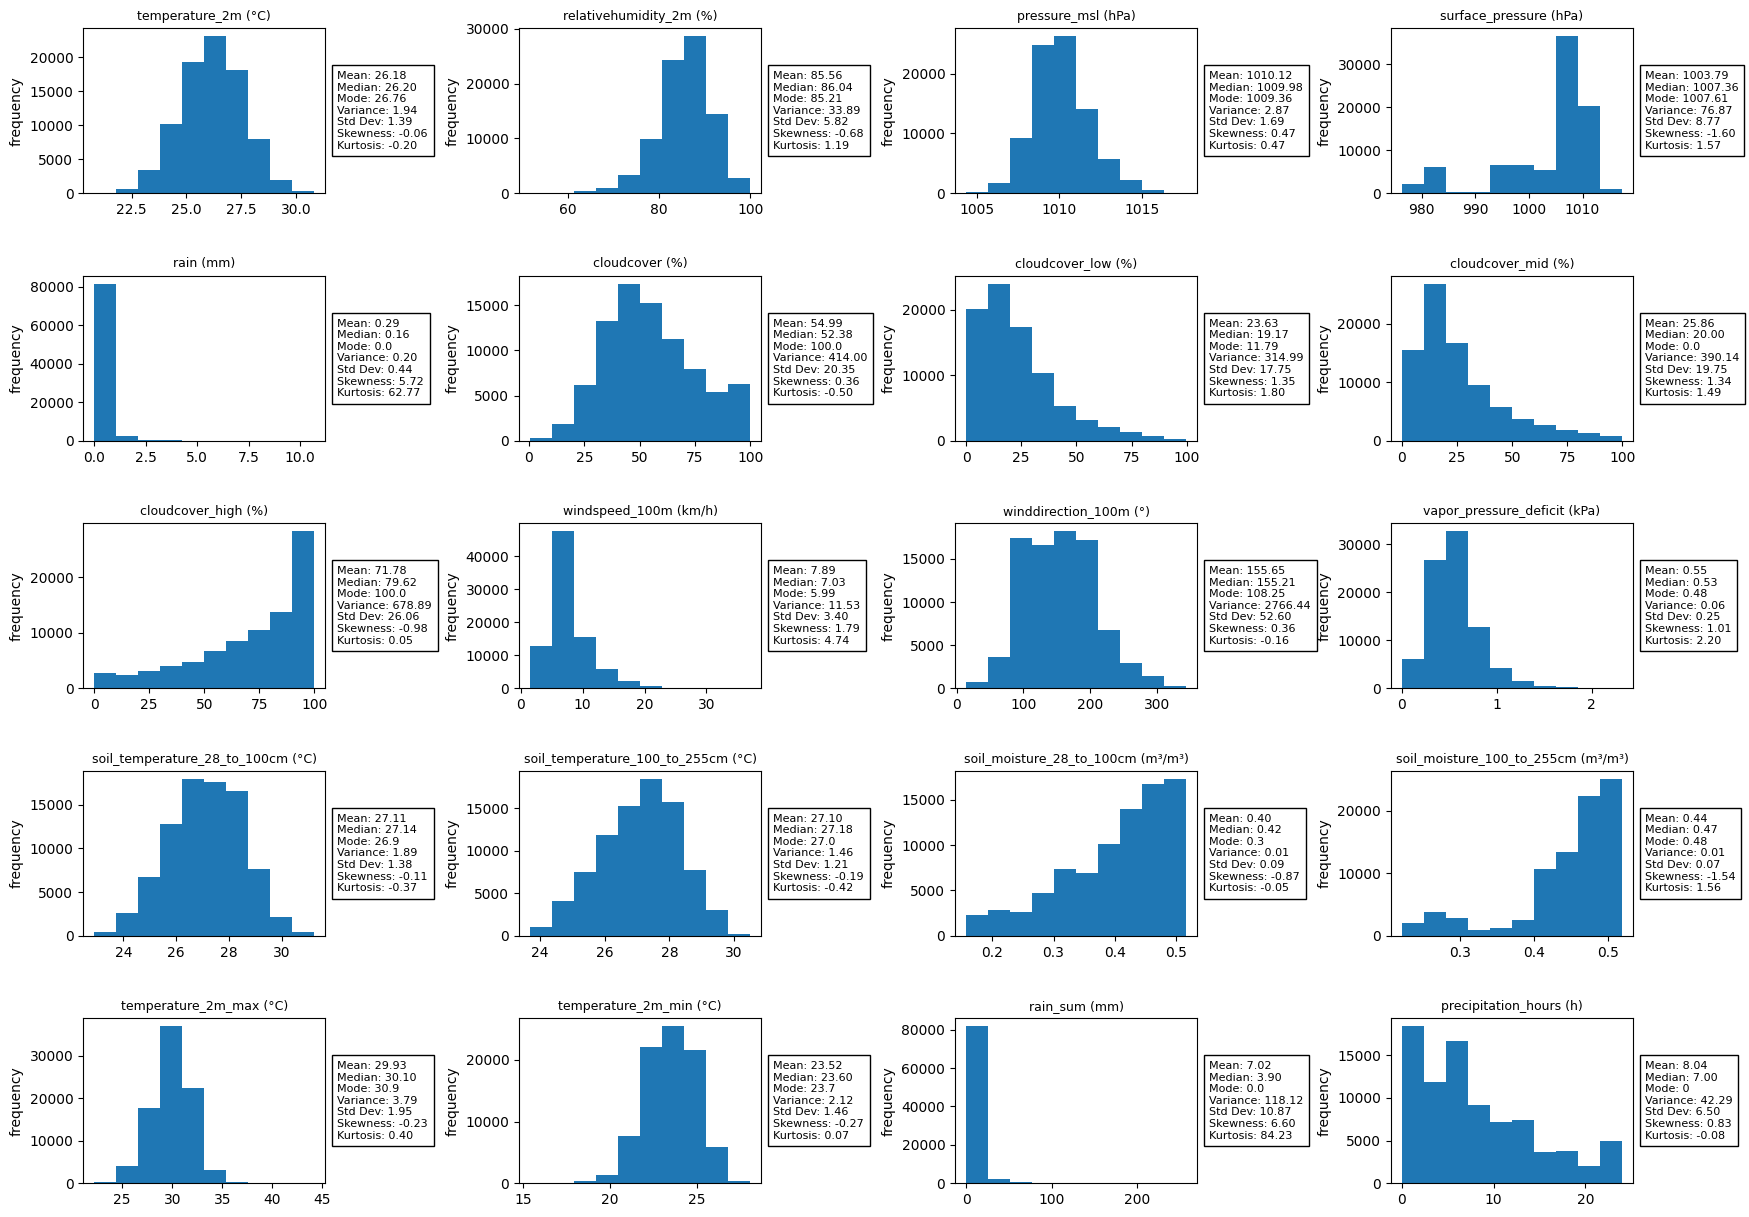

In [12]:
createHistogram(df)

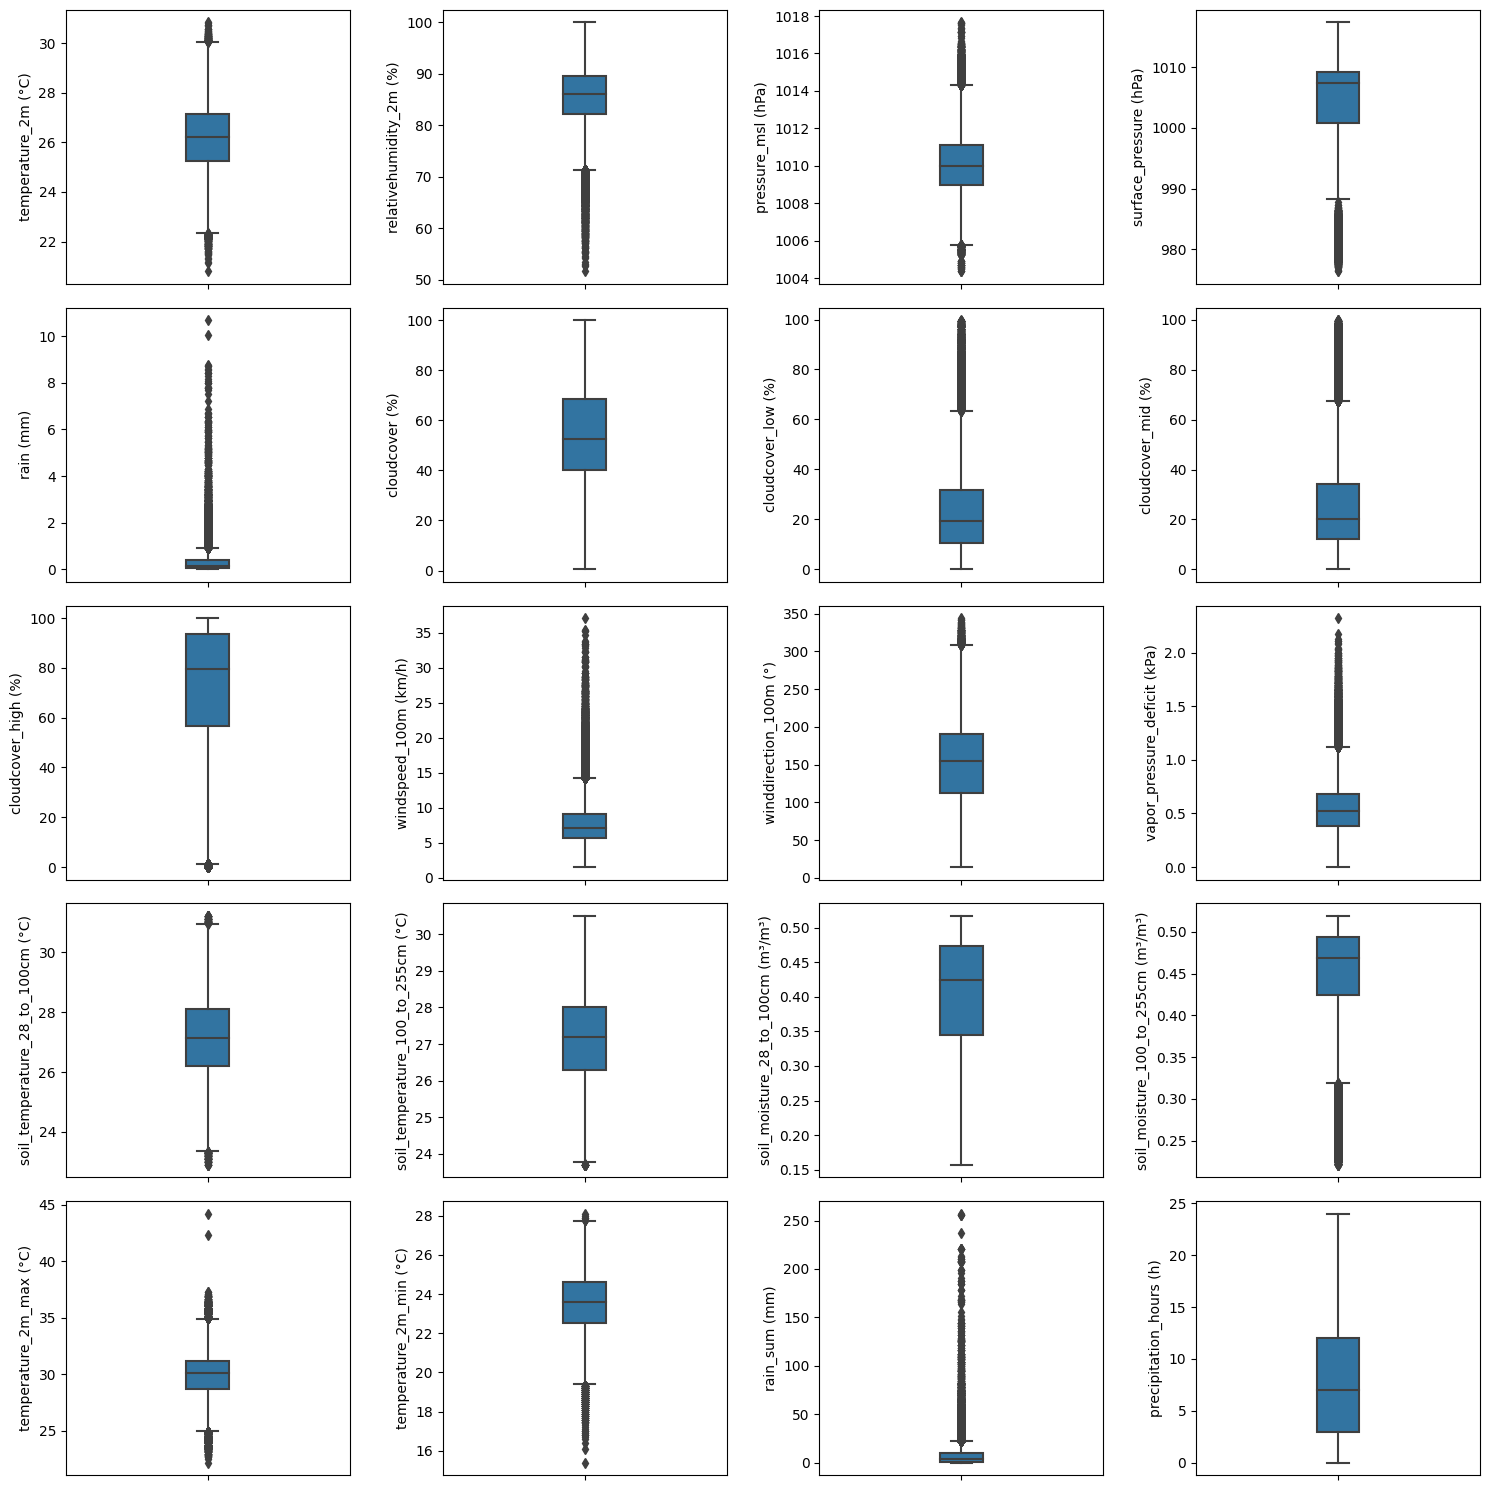

In [13]:
createBoxPlot(df)

In [6]:
df.describe()

,time,temperature_2m (°C),relativehumidity_2m (%),pressure_msl (hPa),surface_pressure (hPa),rain (mm),cloudcover (%),cloudcover_low (%),cloudcover_mid (%),cloudcover_high (%),...,winddirection_100m (°),vapor_pressure_deficit (kPa),soil_temperature_28_to_100cm (°C),soil_temperature_100_to_255cm (°C),soil_moisture_28_to_100cm (m³/m³),soil_moisture_100_to_255cm (m³/m³),temperature_2m_max (°C),temperature_2m_min (°C),rain_sum (mm),precipitation_hours (h)
count,84920,84920.000000,84920.000000,84920.000000,84920.000000,84920.000000,84920.000000,84920.000000,84920.000000,84920.000000,...,84920.000000,84920.000000,84920.000000,84920.000000,84920.000000,84920.000000,84920.000000,84920.000000,84920.000000,84920.000000
mean,2011-08-16 12:00:00,26.182514,85.563206,1010.119403,1003.793030,0.292324,54.991734,23.629893,25.860907,71.784458,...,155.650489,0.552433,27.110668,27.096530,0.401906,0.444399,29.928729,23.515436,7.016132,8.044501
min,2000-01-01 00:00:00,20.791667,51.625000,1004.354167,976.358333,0.000000,0.500000,0.000000,0.000000,0.000000,...,14.166667,0.000000,22.900000,23.700000,0.157000,0.221000,22.200000,15.400000,0.000000,0.000000
25%,2005-10-23 18:00:00,25.229167,82.281250,1008.975000,1000.775000,0.037500,40.083333,10.375000,12.083333,56.708333,...,112.541667,0.382500,26.200000,26.300000,0.344750,0.424000,28.700000,22.500000,0.900000,3.000000
50%,2011-08-16 12:00:00,26.200000,86.041667,1009.979167,1007.358333,0.158333,52.375000,19.166667,20.000000,79.625000,...,155.208333,0.525417,27.141667,27.181250,0.424333,0.468375,30.100000,23.600000,3.900000,7.000000
75%,2017-06-08 06:00:00,27.162500,89.541667,1011.104167,1009.192708,0.391667,68.541667,31.625000,34.208333,93.666667,...,190.916667,0.676667,28.100000,28.000000,0.473167,0.494000,31.200000,24.600000,9.500000,12.000000
max,2023-04-01 00:00:00,30.837500,100.000000,1017.658333,1017.387500,10.683333,100.000000,99.708333,99.875000,100.000000,...,344.291667,2.321250,31.216667,30.500000,0.516917,0.519292,44.200000,28.100000,257.100000,24.000000
std,NaN,1.394099,5.821244,1.693048,8.767398,0.442271,20.346996,17.747952,19.751871,26.055584,...,52.596913,0.254255,1.375427,1.208709,0.087576,0.070779,1.946052,1.455933,10.868467,6.503205


Outlier detection: Removal of outliers


In [14]:
#Removing outlier for temperature_2m_max (°C) Malaysia's highest recorded temp has never gone above 40 degrees
df = df[df['temperature_2m_max (°C)'] <= 40]

#Remove the two outliers as they seem to be isolated events that did not correspond to an occurrence in flood
df = df[df['rain (mm)'] <= 10]

#Removing outlier for temperature_2m_max (°C) Kelantan's's lowest recorded temp has never gone below 15.7
df = df[df['temperature_2m_min (°C)'] >= 15.7]

Diagrams after the removal of outliers from df

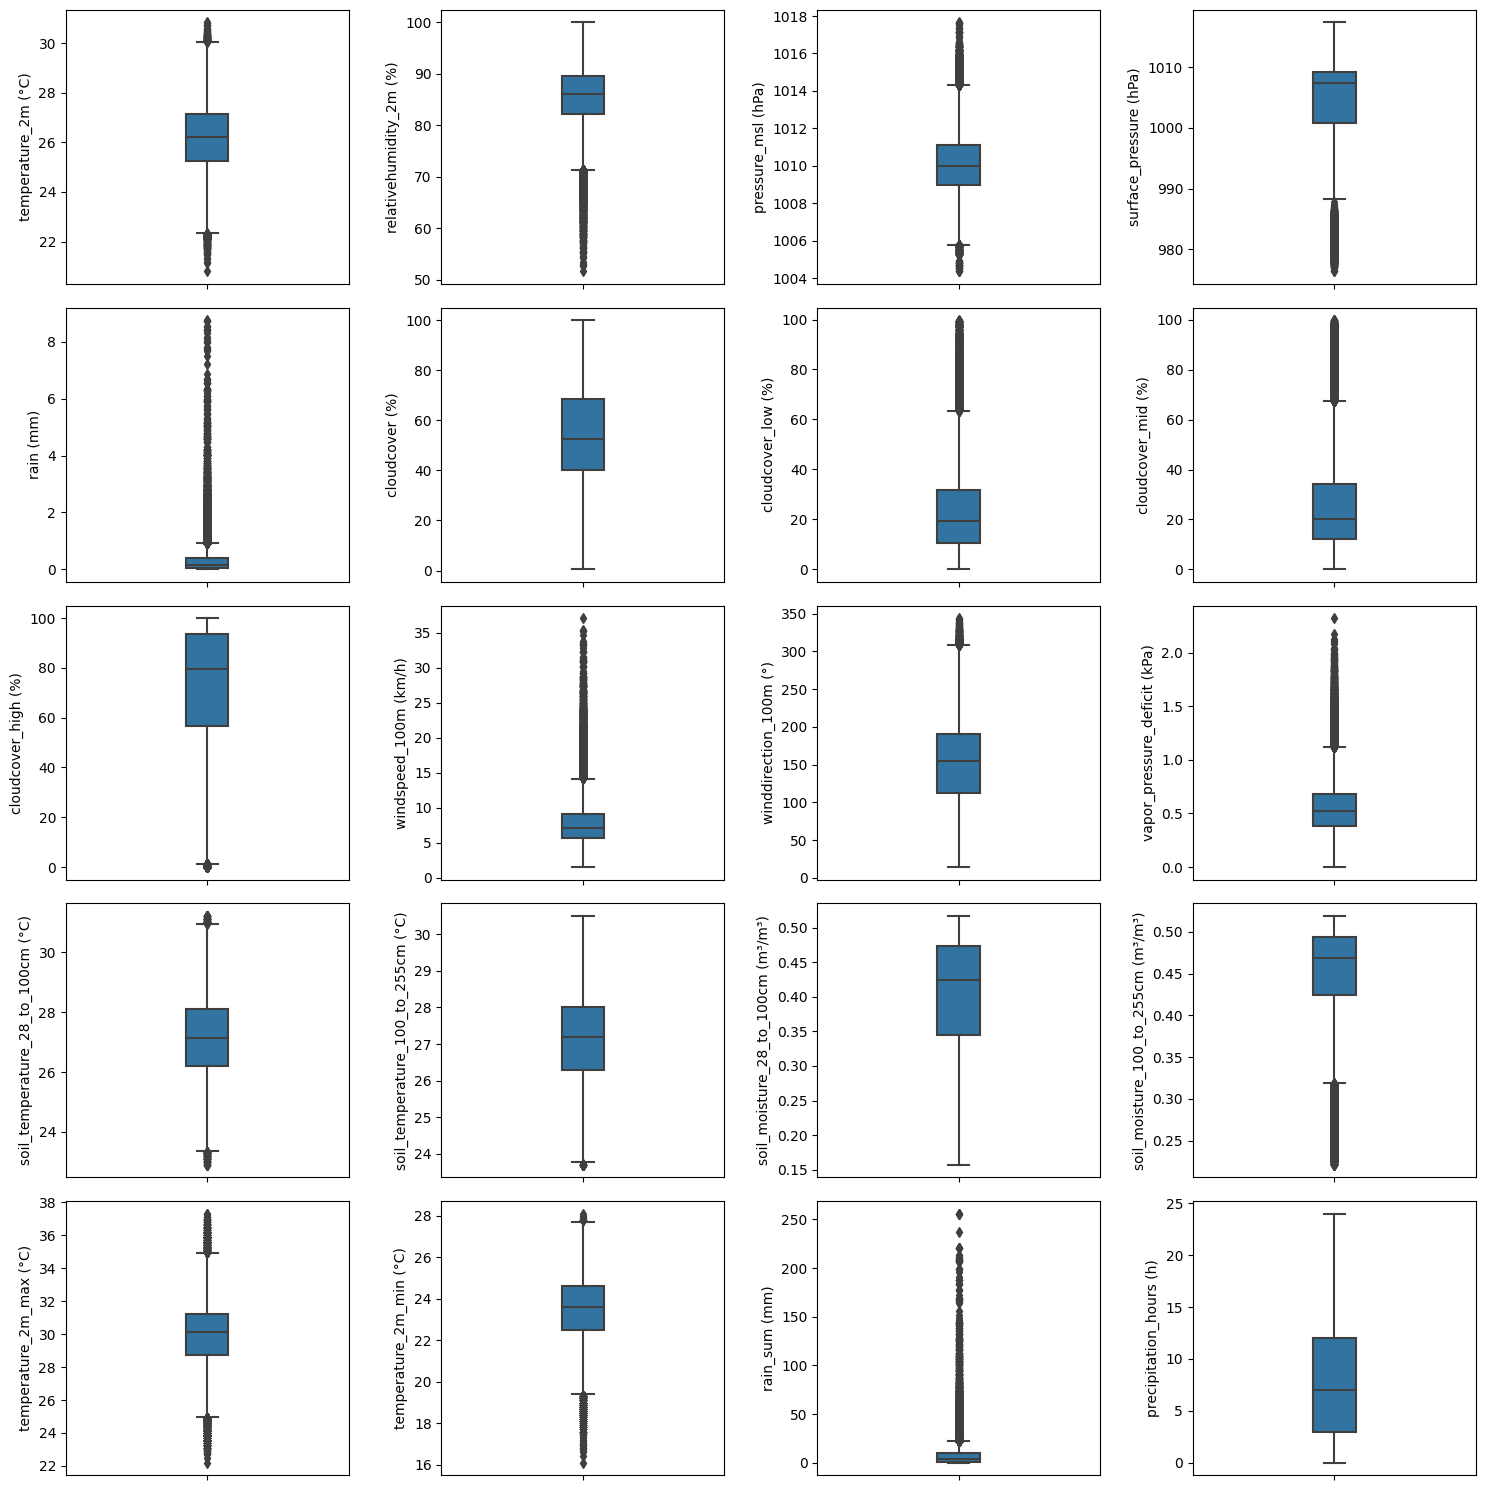

In [15]:
createBoxPlot(df)

In [16]:
df.describe()

,time,temperature_2m (°C),relativehumidity_2m (%),pressure_msl (hPa),surface_pressure (hPa),rain (mm),cloudcover (%),cloudcover_low (%),cloudcover_mid (%),cloudcover_high (%),...,winddirection_100m (°),vapor_pressure_deficit (kPa),soil_temperature_28_to_100cm (°C),soil_temperature_100_to_255cm (°C),soil_moisture_28_to_100cm (m³/m³),soil_moisture_100_to_255cm (m³/m³),temperature_2m_max (°C),temperature_2m_min (°C),rain_sum (mm),precipitation_hours (h)
count,84915,84915.000000,84915.000000,84915.000000,84915.000000,84915.000000,84915.000000,84915.000000,84915.000000,84915.000000,...,84915.000000,84915.000000,84915.000000,84915.000000,84915.000000,84915.000000,84915.000000,84915.000000,84915.000000,84915.000000
mean,2011-08-16 11:14:22.448330752,26.182614,85.562953,1010.119402,1003.793695,0.292075,54.990919,23.628853,25.859111,71.784133,...,155.650878,0.552440,27.110777,27.096617,0.401903,0.444395,29.928556,23.515578,7.010479,8.044020
min,2000-01-01 00:00:00,20.791667,51.625000,1004.354167,976.358333,0.000000,0.500000,0.000000,0.000000,0.000000,...,14.166667,0.000000,22.900000,23.700000,0.157000,0.221000,22.200000,16.100000,0.000000,0.000000
25%,2005-10-23 12:00:00,25.229167,82.270833,1008.975000,1000.779167,0.037500,40.083333,10.375000,12.083333,56.708333,...,112.541667,0.382500,26.200000,26.300000,0.344750,0.424000,28.700000,22.500000,0.900000,3.000000
50%,2011-08-17 00:00:00,26.200000,86.041667,1009.979167,1007.358333,0.158333,52.375000,19.166667,20.000000,79.625000,...,155.208333,0.525417,27.141667,27.183333,0.424333,0.468375,30.100000,23.600000,3.900000,7.000000
75%,2017-06-08 00:00:00,27.162500,89.541667,1011.104167,1009.193750,0.391667,68.541667,31.625000,34.208333,93.666667,...,190.916667,0.676667,28.100000,28.000000,0.473167,0.494000,31.200000,24.600000,9.500000,12.000000
max,2023-04-01 00:00:00,30.837500,100.000000,1017.658333,1017.387500,8.762500,100.000000,99.708333,99.875000,100.000000,...,344.291667,2.321250,31.216667,30.500000,0.516917,0.519292,37.300000,28.100000,256.000000,24.000000
std,NaN,1.394034,5.821004,1.693081,8.766841,0.439556,20.345547,17.745815,19.749010,26.054723,...,52.597412,0.254249,1.375381,1.208687,0.087577,0.070780,1.944832,1.455687,10.809864,6.502736


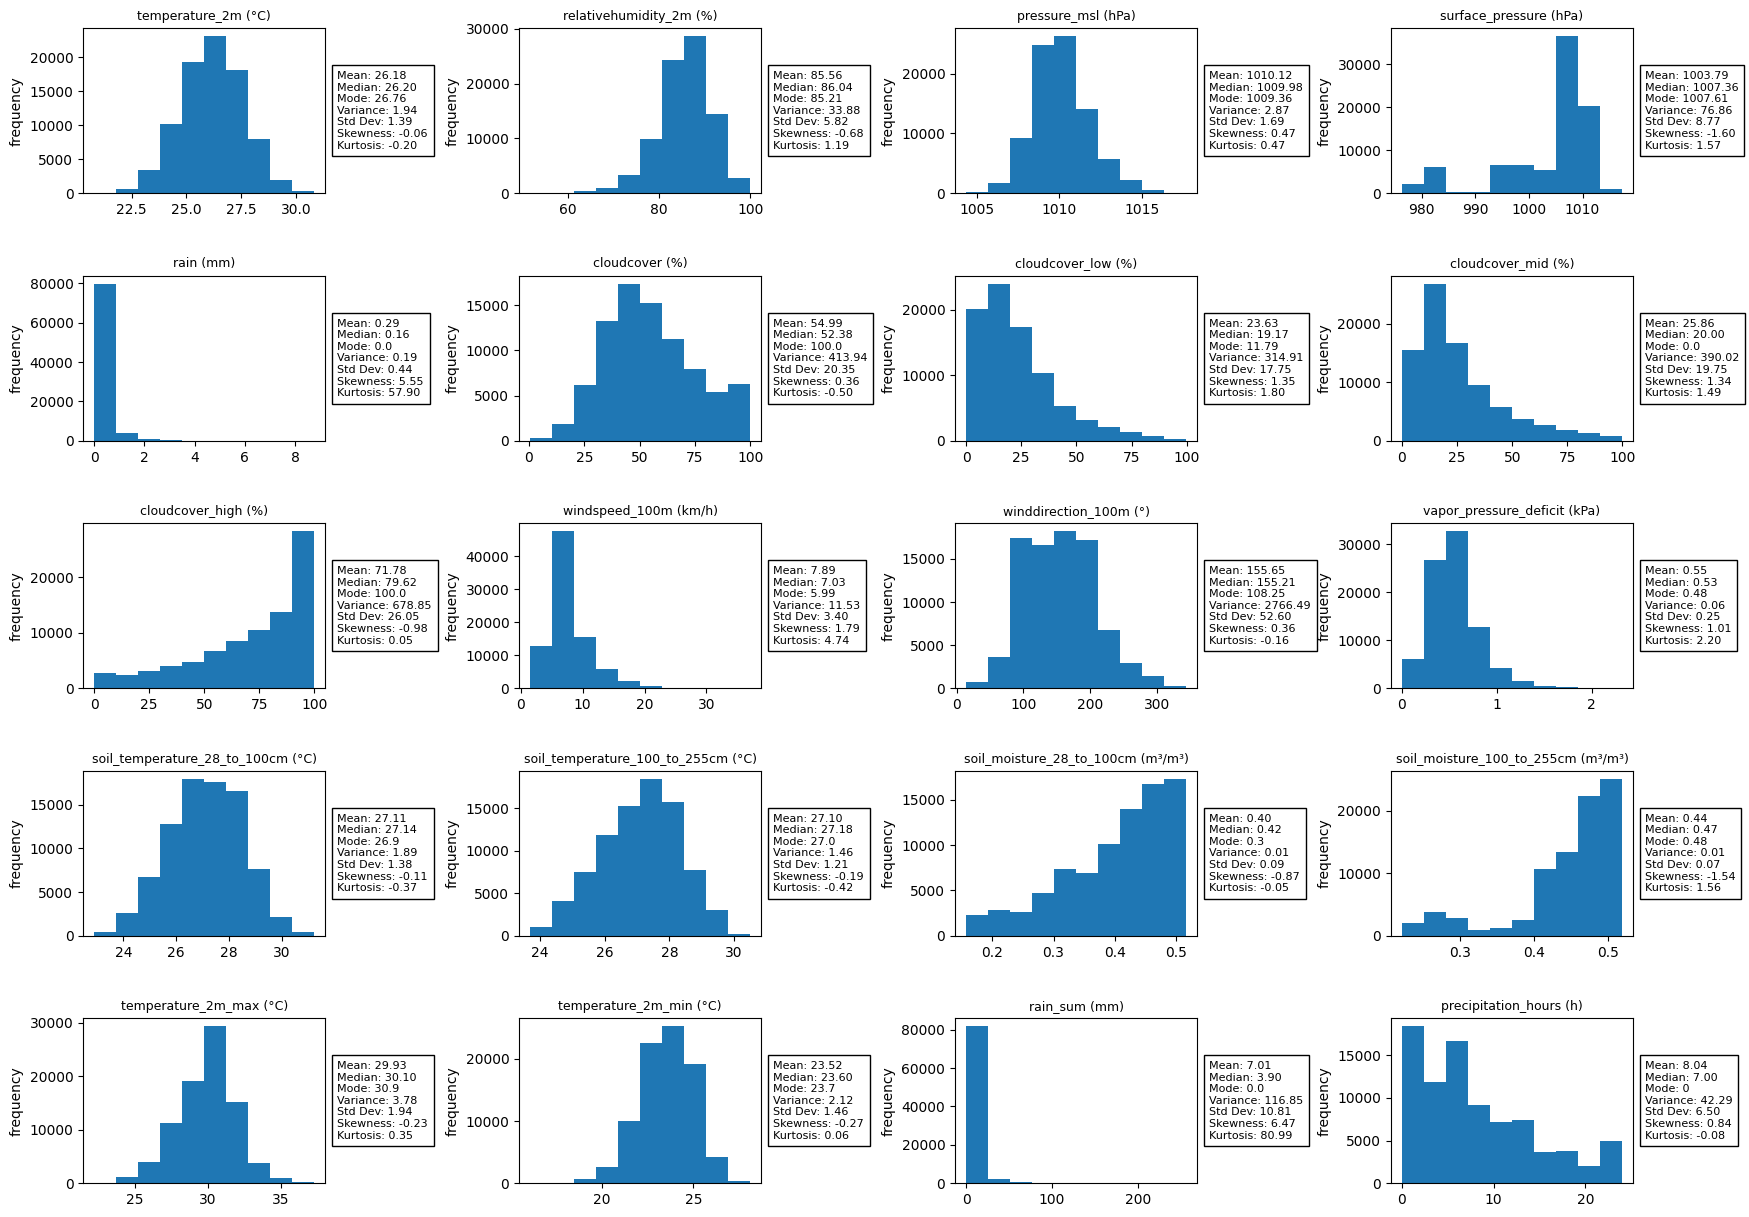

In [17]:
createHistogram(df)

Checking the distribution of the classes (flood (true) vs no flood (false))

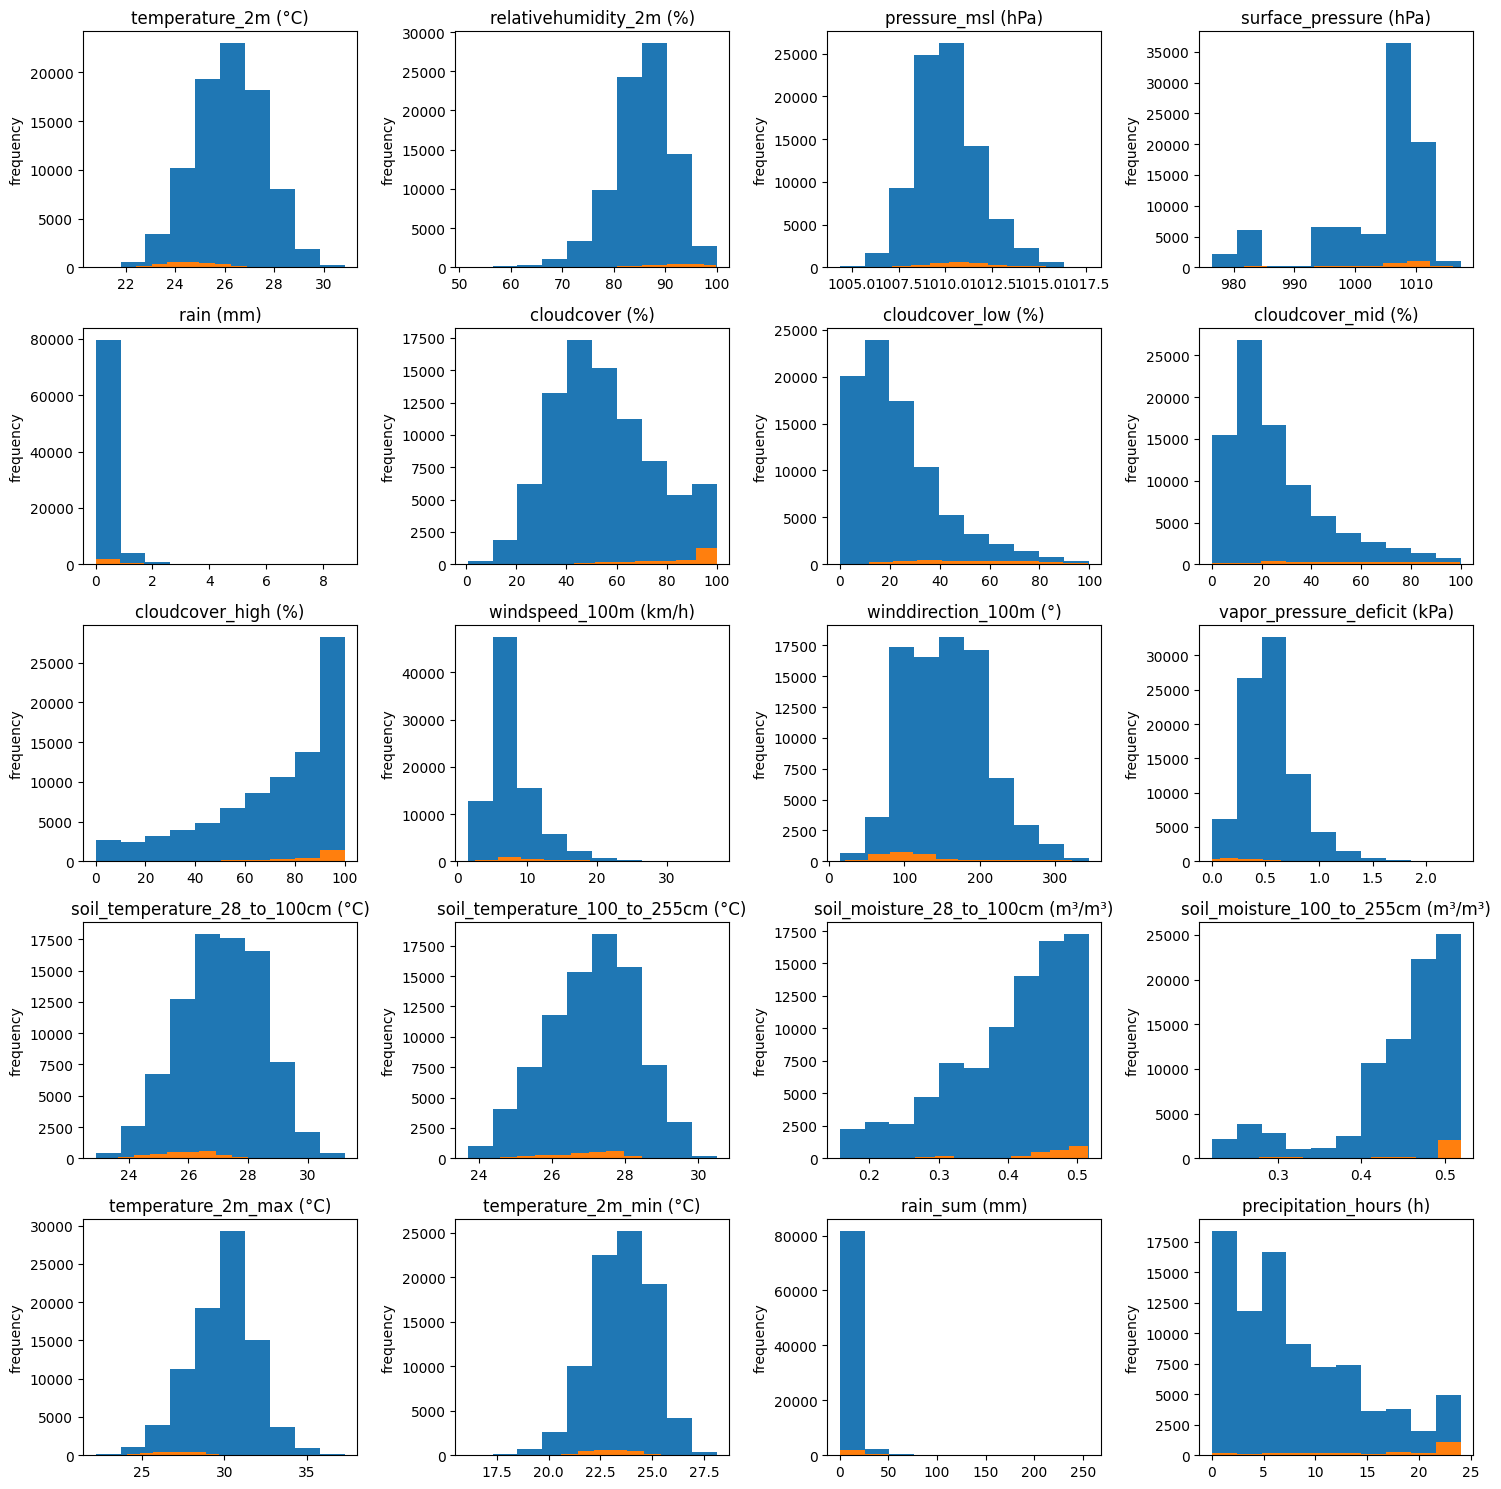

In [20]:
createHistogramDistribution(df, True)

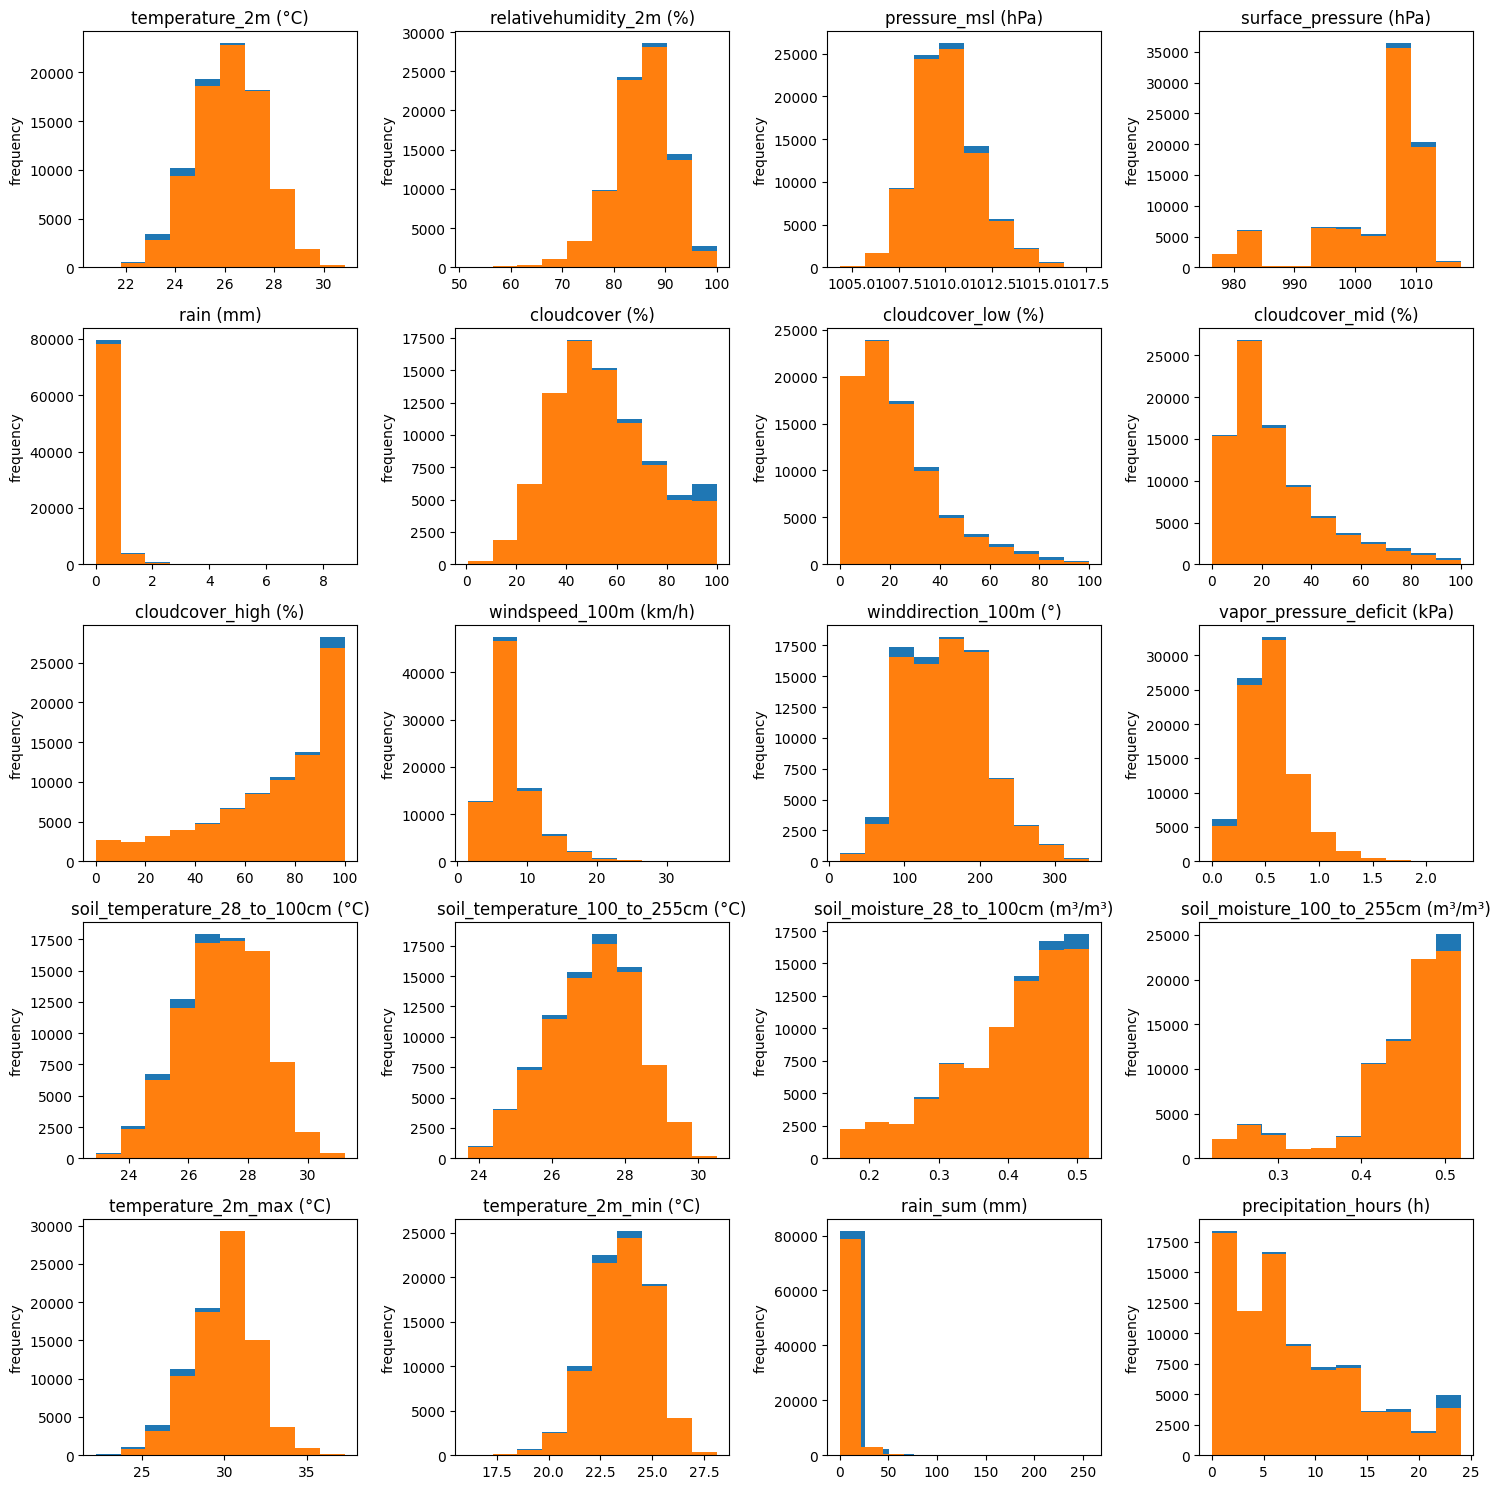

In [21]:
createHistogramDistribution(df,False)

In [22]:
#Check to see how many flood cases (true) there are in the datatset
print(df.loc[df['Flood occurrence'] == True])
#2606 flood cases

            time  temperature_2m (°C)  relativehumidity_2m (%)  \
3250  2000-11-21            24.433333                96.000000   
3251  2000-11-21            25.575000                91.375000   
3252  2000-11-21            24.420833                96.125000   
3256  2000-11-21            24.750000                95.208333   
3258  2000-11-21            23.779167                97.625000   
...          ...                  ...                      ...   
83905 2022-12-21            22.537500                98.583333   
83906 2022-12-21            24.045833                94.916667   
83907 2022-12-21            23.258333                96.916667   
83908 2022-12-21            24.762500                93.458333   
83909 2022-12-21            22.862500                97.708333   

       pressure_msl (hPa)  surface_pressure (hPa)  rain (mm)  cloudcover (%)  \
3250          1008.108333             1008.108333   2.066667      100.000000   
3251          1008.133333             1006.9541

Theres imbalanced data in our dataset so we will need to perform data imbalance treatment. To do so, we are undersampling majority class (no flood cases (false)) 

source: https://towardsdatascience.com/having-an-imbalanced-dataset-here-is-how-you-can-solve-it-1640568947eb

In [23]:
# Shuffle the Dataset.
shuffled_df = df.sample(frac=1,random_state=4)

# Put all the fraud class in a separate dataset.
flooded_df = shuffled_df.loc[shuffled_df['Flood occurrence'] == True]

#Randomly select 2606 observations from the majority class
not_flooded_df = shuffled_df.loc[shuffled_df['Flood occurrence'] == False].sample(n=2606,random_state=42)

# Concatenate both dataframes again
resampled_df = pd.concat([flooded_df, not_flooded_df])


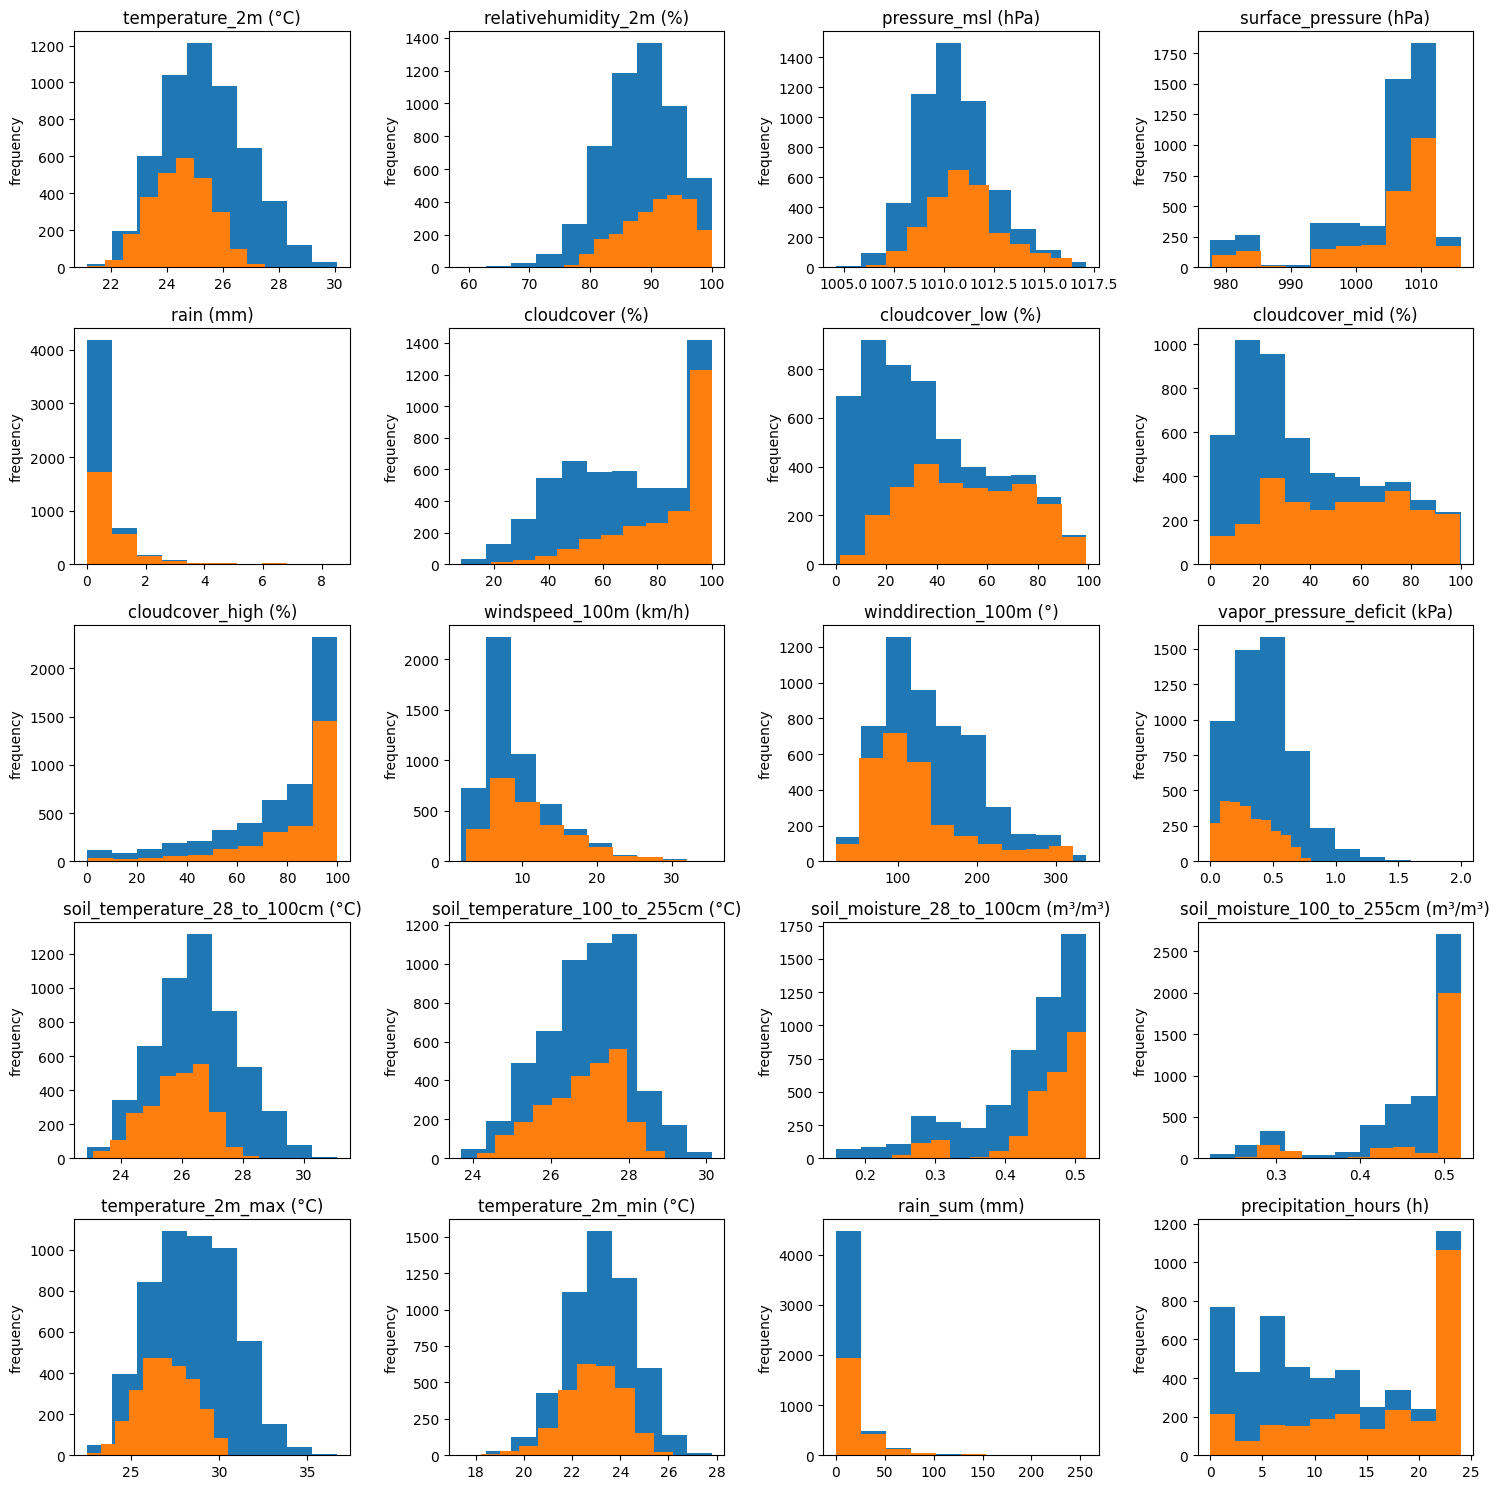

In [24]:
createHistogramDistribution(resampled_df, True)

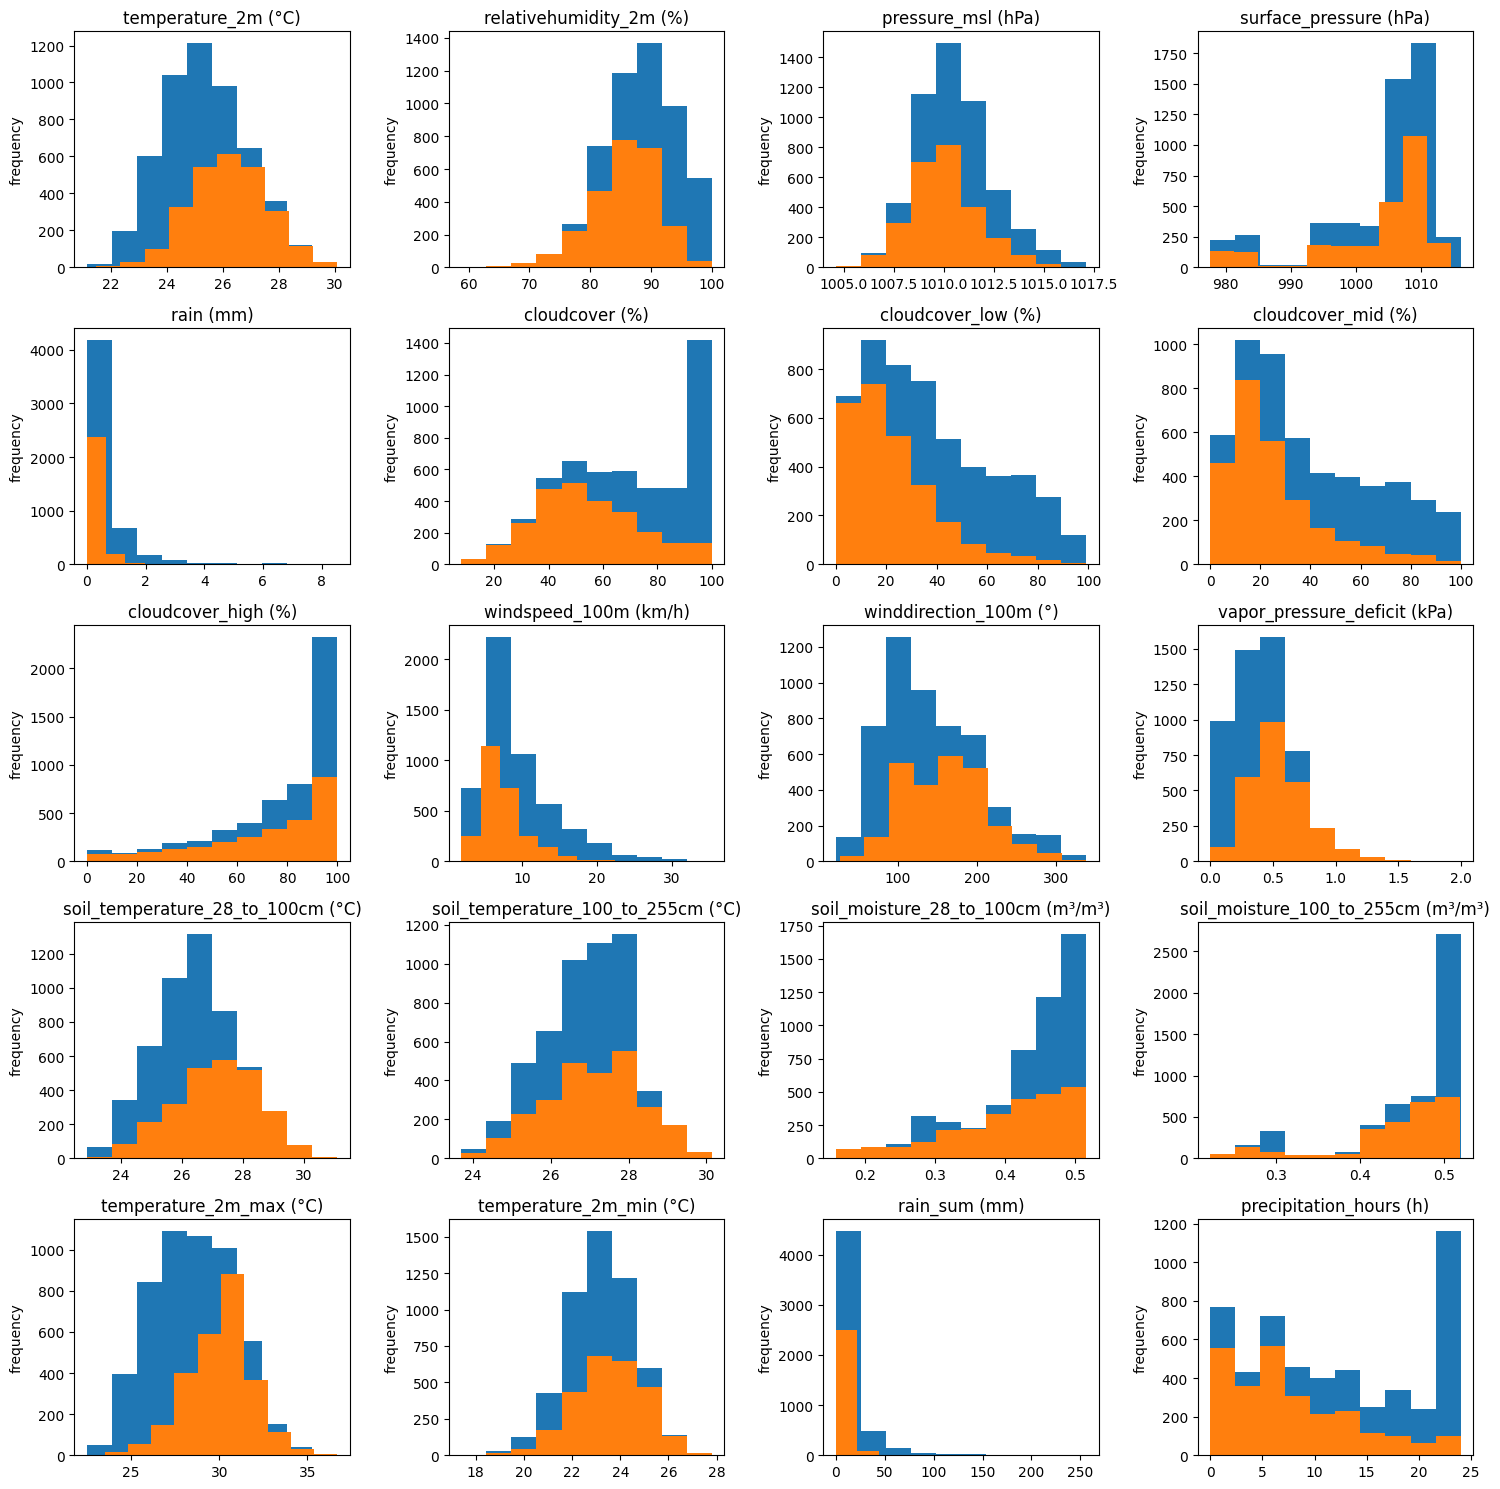

In [25]:
createHistogramDistribution(resampled_df, False)

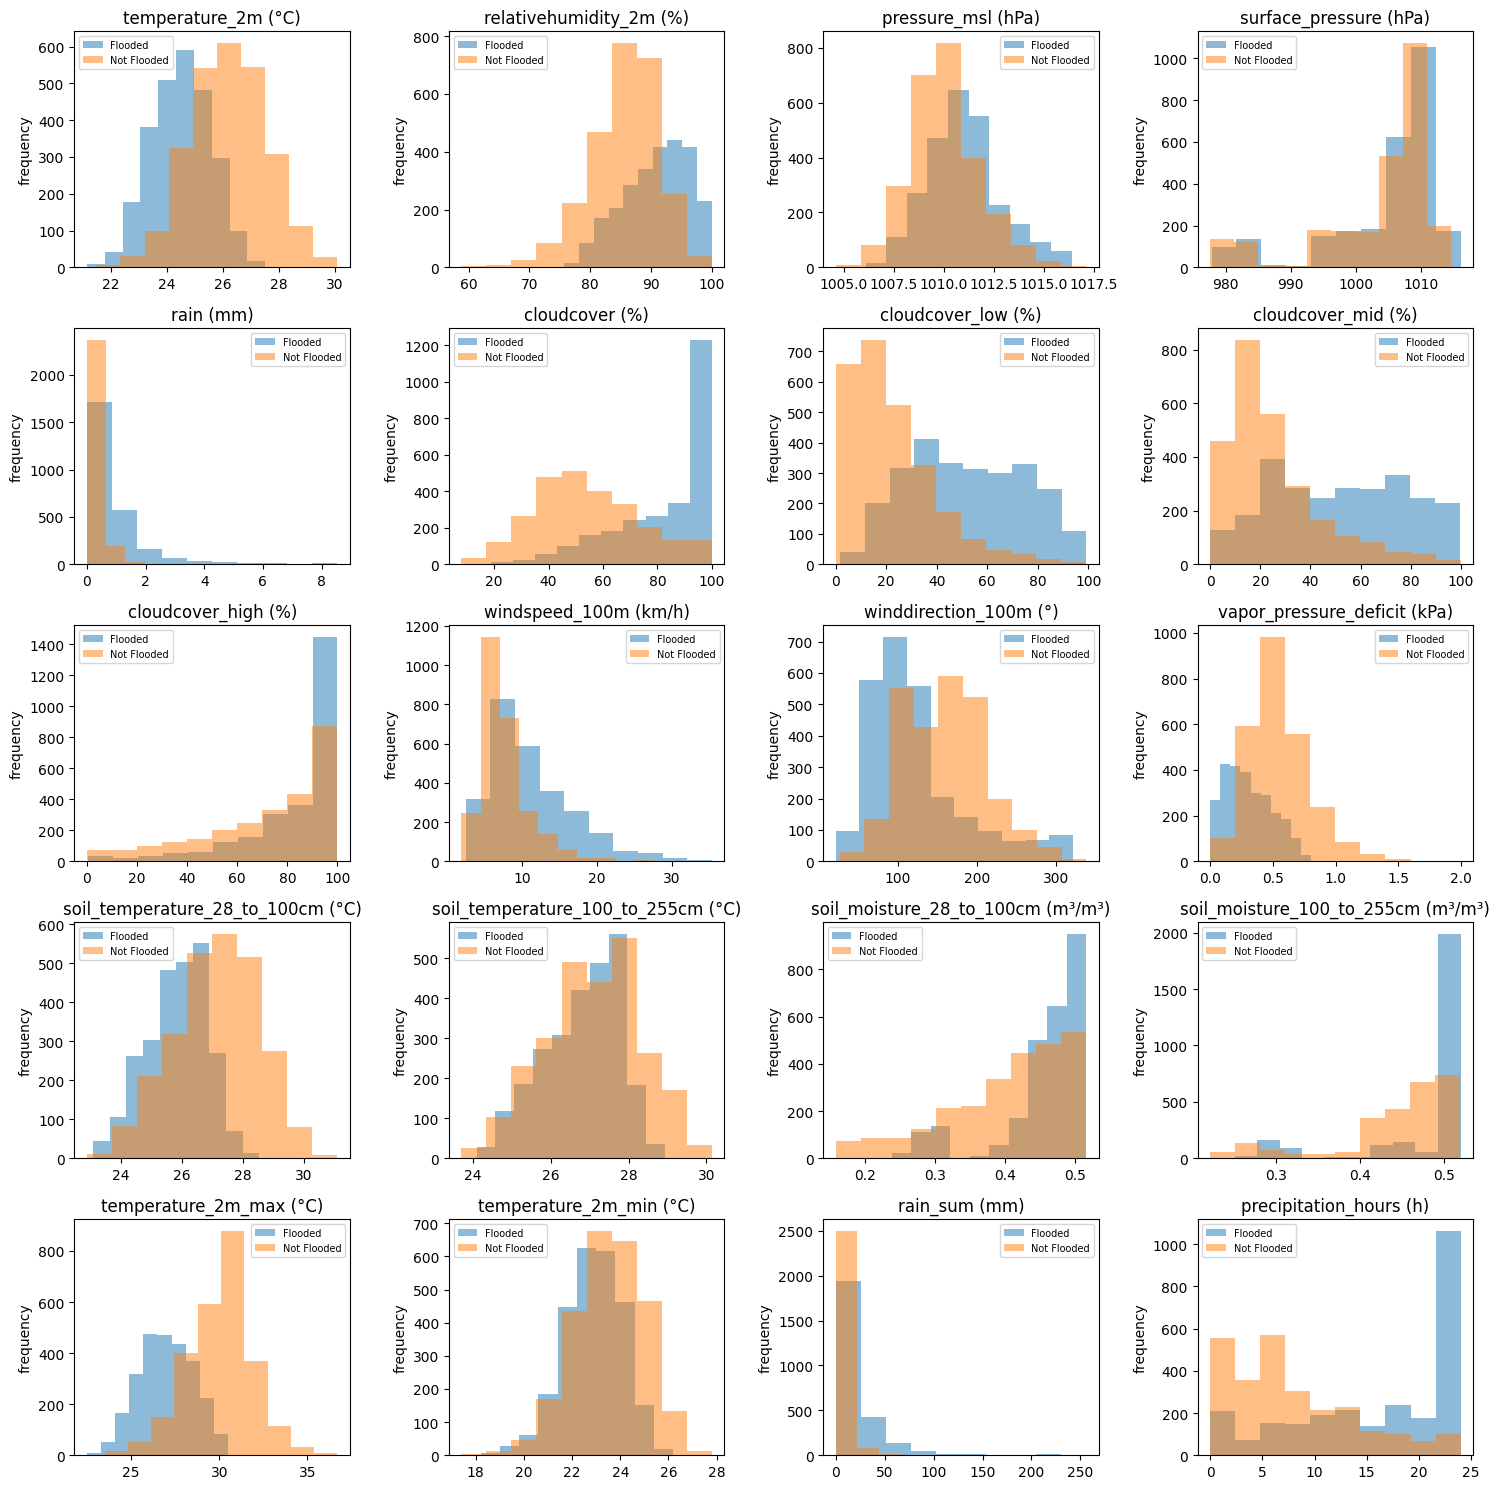

In [26]:

def histogramDistributionSeparateClasses(df):

  column_names = list(df.columns)

  # Convert boolean values to strings ('True' and 'False')
  # df['Flood occurrence'] = df['Flood occurrence'].astype(str)

  column_names = [col for col in column_names if col not in ['time', 'Geo Locations', 'Flood occurrence']]

  # Create the subplots
  fig, axes = plt.subplots(5, 4, figsize=(15, 3*5))

  # Flatten the axes array if necessary
  axes = axes.flatten()

  # Loop through the column names and create histograms in each subplot
  for i, col in enumerate(column_names):
      ax = axes[i]
      ax.hist(df.loc[df['Flood occurrence'] == True, col], label='Flooded', alpha=0.5)
      ax.hist(df.loc[df['Flood occurrence'] == False, col], label='Not Flooded', alpha=0.5)

      ax.set_ylabel('frequency')
      ax.set_title(col)
      ax.legend(fontsize = 7)

  plt.tight_layout()

histogramDistributionSeparateClasses(resampled_df)


Feature selection (error, need to drop non numeric columns)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84915 entries, 0 to 84919
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   time                                84915 non-null  datetime64[ns]
 1   temperature_2m (°C)                 84915 non-null  float64       
 2   relativehumidity_2m (%)             84915 non-null  float64       
 3   pressure_msl (hPa)                  84915 non-null  float64       
 4   surface_pressure (hPa)              84915 non-null  float64       
 5   rain (mm)                           84915 non-null  float64       
 6   cloudcover (%)                      84915 non-null  float64       
 7   cloudcover_low (%)                  84915 non-null  float64       
 8   cloudcover_mid (%)                  84915 non-null  float64       
 9   cloudcover_high (%)                 84915 non-null  float64       
 10  windspeed_100m (km/h)      

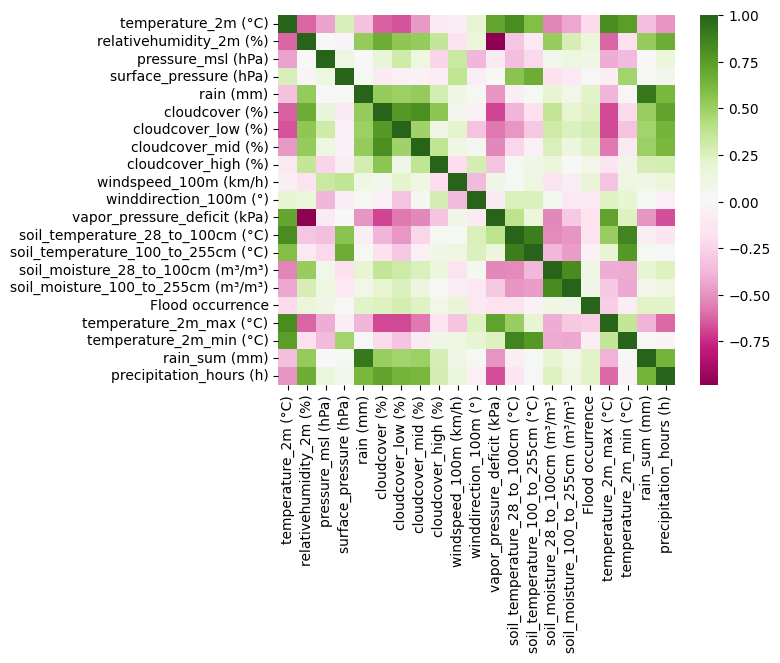

In [97]:
#Heatmap for the Original data (checking to see how the flood occurrence correlations for flood occurrence change after resampling)
createHeapMap(df)

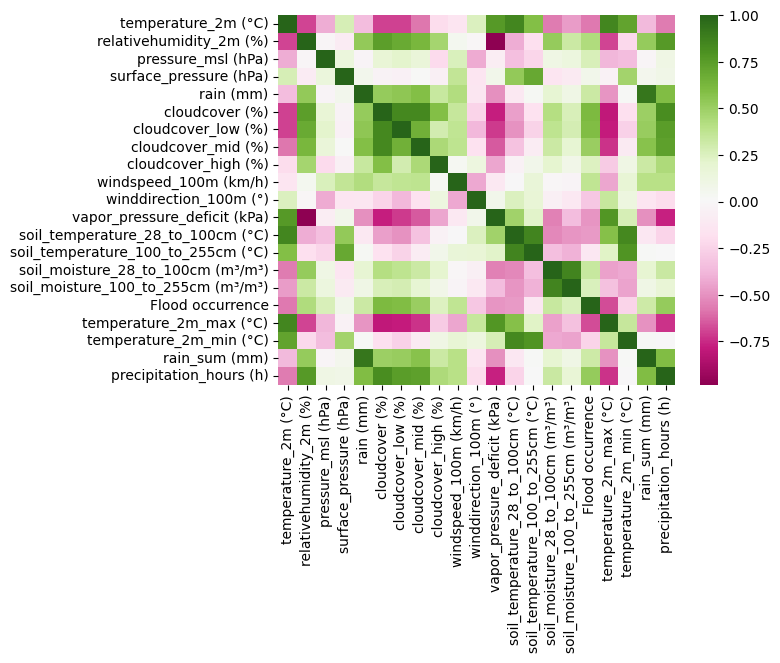

In [98]:
createHeapMap(resampled_df)

In [100]:
resampled_df.drop(['time','Geo Locations'], axis=1).corr()

,temperature_2m (°C),relativehumidity_2m (%),pressure_msl (hPa),surface_pressure (hPa),rain (mm),cloudcover (%),cloudcover_low (%),cloudcover_mid (%),cloudcover_high (%),windspeed_100m (km/h),...,vapor_pressure_deficit (kPa),soil_temperature_28_to_100cm (°C),soil_temperature_100_to_255cm (°C),soil_moisture_28_to_100cm (m³/m³),soil_moisture_100_to_255cm (m³/m³),Flood occurrence,temperature_2m_max (°C),temperature_2m_min (°C),rain_sum (mm),precipitation_hours (h)
temperature_2m (°C),1.000000,-0.688058,-0.414706,0.274543,-0.353952,-0.696393,-0.696674,-0.584187,-0.205816,-0.151177,...,0.767307,0.845507,0.589382,-0.566251,-0.470721,-0.577866,0.851535,0.716741,-0.363107,-0.565994
relativehumidity_2m (%),-0.688058,1.000000,-0.019552,-0.098560,0.529703,0.743302,0.683620,0.624613,0.466996,0.051298,...,-0.982170,-0.414329,-0.191926,0.522615,0.324918,0.429810,-0.692307,-0.217460,0.524493,0.763146
pressure_msl (hPa),-0.414706,-0.019552,1.000000,0.147400,-0.026727,0.178992,0.215978,0.162355,-0.209538,0.259600,...,-0.080390,-0.344046,-0.237857,0.107591,0.135633,0.271120,-0.385283,-0.354511,-0.014696,0.105670
surface_pressure (hPa),0.274543,-0.098560,0.147400,1.000000,0.064340,-0.034054,-0.046279,0.009607,-0.057039,0.361693,...,0.074602,0.533245,0.694075,-0.144305,-0.103270,0.076071,-0.043055,0.479781,0.060357,0.090366
rain (mm),-0.353952,0.529703,-0.026727,0.064340,1.000000,0.520414,0.549551,0.588704,0.337455,0.422689,...,-0.507599,-0.118779,0.031913,0.194456,0.099786,0.319155,-0.489724,0.016943,0.915528,0.590904
cloudcover (%),-0.696393,0.743302,0.178992,-0.034054,0.520414,1.000000,0.838174,0.843555,0.589410,0.342328,...,-0.780606,-0.458180,-0.171069,0.415431,0.266171,0.612478,-0.799349,-0.185899,0.501298,0.814683
cloudcover_low (%),-0.696674,0.683620,0.215978,-0.046279,0.549551,0.838174,1.000000,0.653834,0.289104,0.367490,...,-0.711170,-0.498436,-0.247414,0.380315,0.287176,0.594877,-0.781118,-0.256962,0.516172,0.749326
cloudcover_mid (%),-0.584187,0.624613,0.162355,0.009607,0.588704,0.843555,0.653834,1.000000,0.446665,0.379578,...,-0.645547,-0.324110,-0.086465,0.320341,0.193508,0.505952,-0.731137,-0.105103,0.567534,0.735062
cloudcover_high (%),-0.205816,0.466996,-0.209538,-0.057039,0.337455,0.589410,0.289104,0.446665,1.000000,0.039461,...,-0.438226,-0.045226,0.078463,0.209870,0.081704,0.243190,-0.290243,0.103513,0.324367,0.435056
windspeed_100m (km/h),-0.151177,0.051298,0.259600,0.361693,0.422689,0.342328,0.367490,0.379578,0.039461,1.000000,...,-0.115243,-0.000913,0.168914,-0.007738,-0.027974,0.371353,-0.434311,0.181326,0.399226,0.396897


Selected features
- temperature_2m (°C)
- temperature_2m_max (°C)
- precipitation_hours (h)
- rain_sum (mm)
- cloudcover (%)
- relativehumidity_2m (%)

In [31]:
#Select only the features that are chosen
column_names = list(resampled_df.columns)

column_names = [col for col in column_names if col in ['time', 'temperature_2m (°C)','temperature_2m_max (°C)', 'relativehumidity_2m (%)', 'precipitation_hours (h)', 'rain_sum (mm)', 'cloudcover (%)',
                                                       'Geo Locations', 'Flood occurrence']]


selected_resampled_df = resampled_df[column_names].reset_index()

In [32]:
selected_resampled_df

,index,time,temperature_2m (°C),relativehumidity_2m (%),cloudcover (%),Flood occurrence,Geo Locations,temperature_2m_max (°C),rain_sum (mm),precipitation_hours (h)
0,7283,2001-12-29,21.954167,96.708333,94.125000,True,Gua Musang,25.7,63.3,20
1,62122,2017-01-03,25.408333,91.000000,98.291667,True,Tumpat,26.6,21.9,24
2,62469,2017-02-06,25.679167,84.166667,41.333333,True,Kuala Krai,29.8,0.0,0
3,65449,2017-12-01,24.808333,95.541667,100.000000,True,Kota Bharu,25.8,27.7,24
4,62160,2017-01-07,25.104167,91.250000,78.041667,True,Kuala Krai,28.8,3.1,8
...,...,...,...,...,...,...,...,...,...,...
5207,26653,2007-04-19,28.641667,76.083333,30.666667,False,Tumpat,32.0,0.0,0
5208,34479,2009-06-09,27.304167,81.750000,34.000000,False,Jeli,31.8,0.1,1
5209,18204,2004-12-25,25.533333,84.875000,48.000000,False,Tumpat,27.4,2.8,9
5210,79351,2021-09-22,27.512500,85.791667,41.291667,False,Tumpat,30.0,8.4,10


In [33]:
selected_resampled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5212 entries, 0 to 5211
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   index                    5212 non-null   int64         
 1   time                     5212 non-null   datetime64[ns]
 2   temperature_2m (°C)      5212 non-null   float64       
 3   relativehumidity_2m (%)  5212 non-null   float64       
 4   cloudcover (%)           5212 non-null   float64       
 5   Flood occurrence         5212 non-null   bool          
 6   Geo Locations            5212 non-null   object        
 7   temperature_2m_max (°C)  5212 non-null   float64       
 8   rain_sum (mm)            5212 non-null   float64       
 9   precipitation_hours (h)  5212 non-null   int64         
dtypes: bool(1), datetime64[ns](1), float64(5), int64(2), object(1)
memory usage: 371.7+ KB


In [34]:
selected_resampled_df.to_csv("Kelantan_Weather_Selected.csv", index=False)

Normalizing the selected dataset, used for comparing the accuracy of machine learning models later

In [35]:
normalized_selected_df = minMaxNormalization(selected_resampled_df)

In [36]:
normalized_selected_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5212 entries, 0 to 5211
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   index                               5212 non-null   int64         
 1   time                                5212 non-null   datetime64[ns]
 2   temperature_2m (°C)                 5212 non-null   float64       
 3   relativehumidity_2m (%)             5212 non-null   float64       
 4   cloudcover (%)                      5212 non-null   float64       
 5   Flood occurrence                    5212 non-null   bool          
 6   Geo Locations                       5212 non-null   object        
 7   temperature_2m_max (°C)             5212 non-null   float64       
 8   rain_sum (mm)                       5212 non-null   float64       
 9   precipitation_hours (h)             5212 non-null   int64         
 10  Normalized_index        

In [38]:
# Filter columns that start with 'Normalized_'
normalized_columns = [col for col in normalized_selected_df.columns if ((col.startswith('Normalized_') or col in ['Flood occurrence', 'Geo Locations', 'time']) and col not in ['Normalized_index'])]

# Create a subset of the DataFrame with only the normalized columns
normalized_selected_df_only = normalized_selected_df[normalized_columns]

In [39]:
normalized_selected_df_only.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5212 entries, 0 to 5211
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   time                                5212 non-null   datetime64[ns]
 1   Flood occurrence                    5212 non-null   bool          
 2   Geo Locations                       5212 non-null   object        
 3   Normalized_temperature_2m (°C)      5212 non-null   float64       
 4   Normalized_relativehumidity_2m (%)  5212 non-null   float64       
 5   Normalized_cloudcover (%)           5212 non-null   float64       
 6   Normalized_temperature_2m_max (°C)  5212 non-null   float64       
 7   Normalized_rain_sum (mm)            5212 non-null   float64       
 8   Normalized_precipitation_hours (h)  5212 non-null   float64       
dtypes: bool(1), datetime64[ns](1), float64(6), object(1)
memory usage: 331.0+ KB


In [40]:
normalized_selected_df_only

,time,Flood occurrence,Geo Locations,Normalized_temperature_2m (°C),Normalized_relativehumidity_2m (%),Normalized_cloudcover (%),Normalized_temperature_2m_max (°C),Normalized_rain_sum (mm),Normalized_precipitation_hours (h)
0,2001-12-29,True,Gua Musang,0.091078,0.920121,0.936170,0.225352,0.247266,0.833333
1,2017-01-03,True,Tumpat,0.476301,0.781598,0.981440,0.288732,0.085547,1.000000
2,2017-02-06,True,Kuala Krai,0.506506,0.615774,0.362608,0.514085,0.000000,0.000000
3,2017-12-01,True,Kota Bharu,0.409387,0.891810,1.000000,0.232394,0.108203,1.000000
4,2017-01-07,True,Kuala Krai,0.442379,0.787664,0.761431,0.443662,0.012109,0.333333
...,...,...,...,...,...,...,...,...,...
5207,2007-04-19,False,Tumpat,0.836896,0.419616,0.246718,0.669014,0.000000,0.000000
5208,2009-06-09,False,Jeli,0.687732,0.557128,0.282933,0.654930,0.000391,0.041667
5209,2004-12-25,False,Tumpat,0.490242,0.632963,0.435038,0.345070,0.010937,0.375000
5210,2021-09-22,False,Tumpat,0.710967,0.655207,0.362155,0.528169,0.032813,0.416667


In [101]:
normalized_selected_df_only.to_csv("Kelantan_Weather_Normalized.csv", index=False)

# <h3><u>Building the models</u></h3>

In [76]:
normalized_df = pd.read_csv("Kelantan_Weather_Normalized.csv", low_memory=False)
normalized_df['time'] = pd.to_datetime(normalized_df['time'], errors='coerce')

unnormalized_df = pd.read_csv("Kelantan_Weather_Selected.csv", low_memory=False)
unnormalized_df['time'] = pd.to_datetime(unnormalized_df['time'], errors='coerce')

In [77]:

norm_X = normalized_df.drop(["time","Flood occurrence","Geo Locations"], axis=1)     # drop labels from original data
norm_y = normalized_df["Flood occurrence"].copy()    # copy the labels to another dataframe/series

unnorm_X = unnormalized_df.drop(["time","Flood occurrence","Geo Locations"], axis=1)     # drop labels from original data
unnorm_y = unnormalized_df["Flood occurrence"].copy()    # copy the labels to another dataframe/series



In [107]:
print(norm_X.info())
print("\n")
print(norm_y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5212 entries, 0 to 5211
Data columns (total 6 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Normalized_temperature_2m (°C)      5212 non-null   float64
 1   Normalized_relativehumidity_2m (%)  5212 non-null   float64
 2   Normalized_cloudcover (%)           5212 non-null   float64
 3   Normalized_temperature_2m_max (°C)  5212 non-null   float64
 4   Normalized_rain_sum (mm)            5212 non-null   float64
 5   Normalized_precipitation_hours (h)  5212 non-null   float64
dtypes: float64(6)
memory usage: 244.4 KB
None


<class 'pandas.core.series.Series'>
RangeIndex: 5212 entries, 0 to 5211
Series name: Flood occurrence
Non-Null Count  Dtype
--------------  -----
5212 non-null   bool 
dtypes: bool(1)
memory usage: 5.2 KB
None


In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV


In [195]:
def createConfusionMatrix(y, prediction, title): 
  # Calculate and print the confusion matrix for test set
  confusion_matrix_test = confusion_matrix(y, prediction)
  cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_test, display_labels = [False, True])
  cm_display.plot()
  plt.title(title)
  plt.show()
  true_negatives = confusion_matrix_test[0, 0]
  false_positives = confusion_matrix_test[0, 1]
  false_negatives = confusion_matrix_test[1, 0]
  true_positives = confusion_matrix_test[1, 1]

  sensitivity = true_positives / (true_positives + false_negatives)
  specificity = true_negatives / (true_negatives + false_positives)

  print("Sensitivity (True Positive Rate):", sensitivity)
  print("Specificity (True Negative Rate):", specificity)

Logistic Regression

In [131]:
def logisticReg(X, y):

  #Split into training and validation set
  XX_train, XX_val, yy_train, yy_val = train_test_split(X, y, test_size=0.25, random_state=42)


  #Train logistic regression model with training set
  lr_model = LogisticRegression(max_iter=10000)
  lr_model = lr_model.fit(XX_train, yy_train)

  # Calculate the accuracy score for the training set
  train_score = lr_model.score(XX_train, yy_train)
  print("Training accuracy score:", train_score)

  #Make prediction on validation set
  val_predictions = lr_model.predict(XX_val)

  #Calculating the accuracy score for the validation set (comparing it do the actual y value)
  val_score = accuracy_score(yy_val, val_predictions)
  print("Validation accuracy score:", val_score)

  #Confusion matrix for validation data
  createConfusionMatrix(yy_val, val_predictions)



Decision Tree

In [132]:
def decisionTreeClassifier(X, y):
  #Split into training and validation set
  XX_train, XX_val, yy_train, yy_val = train_test_split(X, y, test_size=0.25, random_state=42)

  # Train the decision tree classifier
  dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
  dt_model.fit(XX_train, yy_train)

  # Calculate the accuracy score for the training set
  train_score = dt_model.score(XX_train, yy_train)
  print("Training accuracy score:", train_score)

  # Make predictions on the validation set
  val_predictions = dt_model.predict(XX_val)

  # Calculate the accuracy score for the validation set
  val_score = accuracy_score(yy_val, val_predictions)
  print("Validation accuracy score:", val_score)

  #Confusion matrix for validation data
  createConfusionMatrix(yy_val, val_predictions)

K-Nearest-Neighbour

In [133]:
def kNN(X, y):
# Split into training and validation set
  XX_train, XX_val, yy_train, yy_val = train_test_split(X, y, test_size=0.25, random_state=42)

  knn_model = KNeighborsClassifier(n_neighbors=7)

  knn_model.fit(XX_train, yy_train)

  # Calculate the accuracy score for the training set
  train_score = knn_model.score(XX_train, yy_train)
  print("Training accuracy score:", train_score)

  # Make predictions on the validation set
  val_predictions = knn_model.predict(XX_val)

  # Calculate the accuracy score for the validation set
  val_score = knn_model.score(XX_val, yy_val)
  print("Validation accuracy score:", val_score)

  #Confusion matrix for validation data
  createConfusionMatrix(yy_val, val_predictions)




Training accuracy score: 0.8142747505755947
Validation accuracy score: 0.8211818879508825


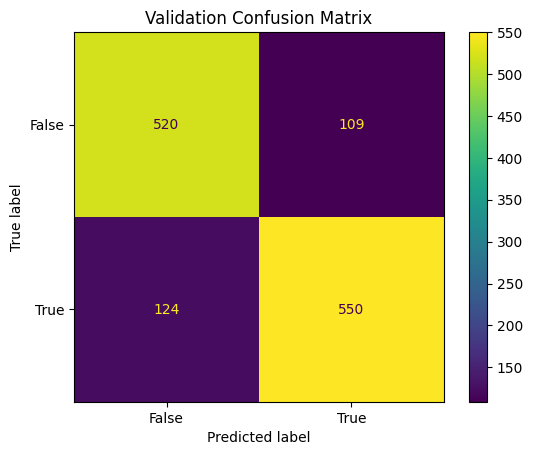

Sensitivity (True Positive Rate): 0.8160237388724035
Specificity (True Negative Rate): 0.8267090620031796


In [134]:
logisticReg(norm_X, norm_y)

Training accuracy score: 0.786902020977232
Validation accuracy score: 0.795088257866462


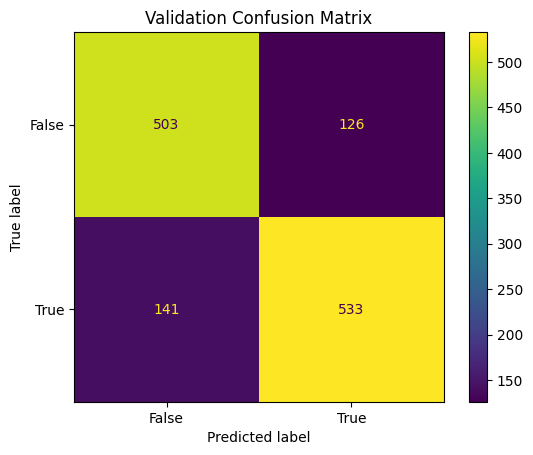

Sensitivity (True Positive Rate): 0.7908011869436202
Specificity (True Negative Rate): 0.7996820349761526


In [135]:
logisticReg(unnorm_X, unnorm_y)

Training accuracy score: 0.8332054233819391
Validation accuracy score: 0.8150422102839601


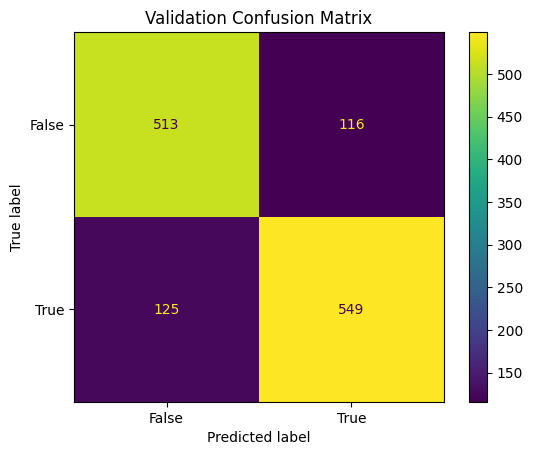

Sensitivity (True Positive Rate): 0.814540059347181
Specificity (True Negative Rate): 0.8155802861685215


In [136]:
decisionTreeClassifier(norm_X, norm_y)

Training accuracy score: 0.8869276029675108
Validation accuracy score: 0.8925556408288565


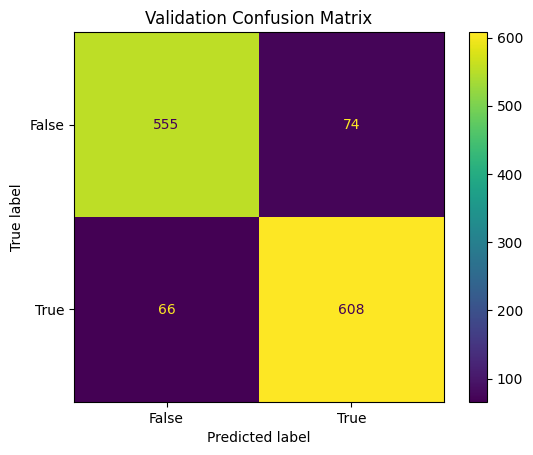

Sensitivity (True Positive Rate): 0.9020771513353115
Specificity (True Negative Rate): 0.8823529411764706


In [137]:
decisionTreeClassifier(unnorm_X, unnorm_y)

Training accuracy score: 0.866462010744436
Validation accuracy score: 0.8280890253261703


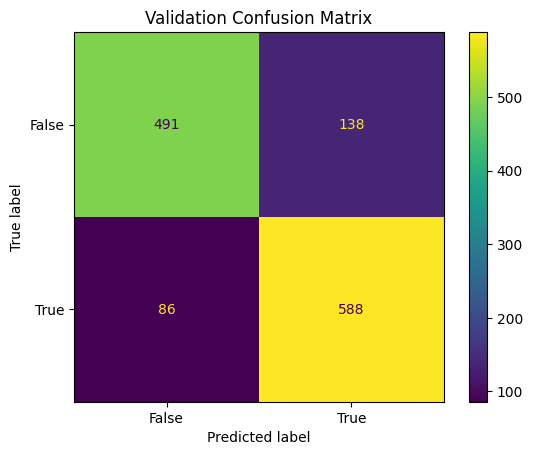

Sensitivity (True Positive Rate): 0.8724035608308606
Specificity (True Negative Rate): 0.78060413354531


In [138]:
kNN(norm_X, norm_y)

Training accuracy score: 0.9831158864159631
Validation accuracy score: 0.9815809669992326


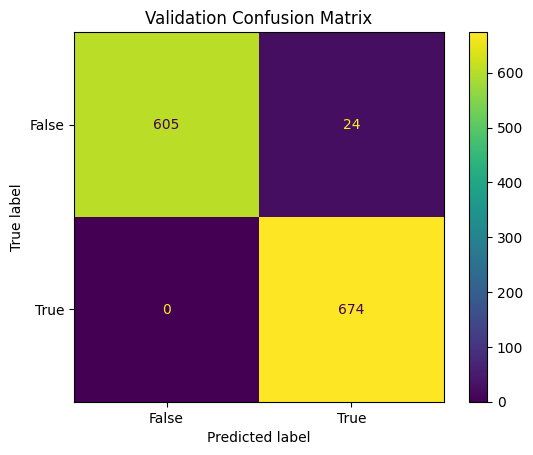

Sensitivity (True Positive Rate): 1.0
Specificity (True Negative Rate): 0.9618441971383148


In [139]:
kNN(unnorm_X, unnorm_y)

<h3>Hyperparameter tuning</h3>

Decision tree classifier

In [140]:
XX_train, XX_val, yy_train, yy_val = train_test_split(norm_X, norm_y, test_size=0.25, random_state=42)
XX_train, XX_test, yy_train, yy_test = train_test_split(XX_train, yy_train, test_size=0.25, random_state=1)


In [164]:
def decisionTreeGridSearch():
        model = DecisionTreeClassifier()
        parameters = {
            'criterion': ['gini', 'entropy'],
            'splitter': ['best', 'random'],
            'max_depth': [1, 10, 100, 1000]
        }

        gridSearch = GridSearchCV(
            estimator=model, 
            param_grid=parameters, 
            cv=10,  
            n_jobs=-1  
        )

        gridSearch.fit(XX_train, yy_train)
        results = pd.DataFrame(gridSearch.cv_results_)
        return results




Logistical Regression

In [165]:
def logisticRegressionGridSearch():
    model = LogisticRegression()
    parameters = {
        'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
        'penalty': ['l1', 'l2'],
        'C': [0.1, 1, 10, 100]
    }

    gridSearch = GridSearchCV(
        estimator=model,
        param_grid=parameters,
        cv=10,
        n_jobs=-1
    )

    gridSearch.fit(XX_train, yy_train)
    results = pd.DataFrame(gridSearch.cv_results_)
    return results

k-Nearest Neighbour

In [166]:
def knnGridSearch():
    model = KNeighborsClassifier()
    parameters = {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance'],
        'p': [1, 2]
    }

    gridSearch = GridSearchCV(
        estimator=model,
        param_grid=parameters,
        cv=10,
        n_jobs=-1
    )

    gridSearch.fit(XX_train, yy_train)
    results = pd.DataFrame(gridSearch.cv_results_)
    return results

<hr></hr>

In [204]:
results = decisionTreeGridSearch()
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_splitter,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006328,0.003192,0.002314,0.001999,gini,1,best,"{'criterion': 'gini', 'max_depth': 1, 'splitte...",0.795918,0.815700,...,0.802048,0.774744,0.774744,0.815700,0.781570,0.815700,0.819113,0.797339,0.017741,5
1,0.002680,0.002584,0.004171,0.002534,gini,1,random,"{'criterion': 'gini', 'max_depth': 1, 'splitte...",0.792517,0.754266,...,0.740614,0.713311,0.771331,0.778157,0.744027,0.788396,0.788396,0.749218,0.049077,15
2,0.014376,0.005057,0.002195,0.003395,gini,10,best,"{'criterion': 'gini', 'max_depth': 10, 'splitt...",0.836735,0.802048,...,0.791809,0.802048,0.805461,0.832765,0.805461,0.822526,0.798635,0.808929,0.015288,1
3,0.005697,0.004591,0.001553,0.002612,gini,10,random,"{'criterion': 'gini', 'max_depth': 10, 'splitt...",0.792517,0.781570,...,0.822526,0.784983,0.781570,0.795222,0.805461,0.839590,0.822526,0.796999,0.025765,6
4,0.015197,0.003448,0.002558,0.003410,gini,100,best,"{'criterion': 'gini', 'max_depth': 100, 'split...",0.853741,0.802048,...,0.778157,0.802048,0.805461,0.802048,0.771331,0.802048,0.802048,0.801074,0.020721,3


In [208]:
#Decision Tree 
results_param = results.loc[results['rank_test_score'].idxmin()]
print(results_param)

mean_fit_time                                                 0.014376
std_fit_time                                                  0.005057
mean_score_time                                               0.002195
std_score_time                                                0.003395
param_criterion                                                   gini
param_max_depth                                                     10
param_splitter                                                    best
params               {'criterion': 'gini', 'max_depth': 10, 'splitt...
split0_test_score                                             0.836735
split1_test_score                                             0.802048
split2_test_score                                             0.791809
split3_test_score                                             0.791809
split4_test_score                                             0.802048
split5_test_score                                             0.805461
split6

In [169]:
results = logisticRegressionGridSearch()
results.head()

c:\Users\Sarah\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
120 fits failed out of a total of 400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Sarah\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Sarah\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001898,0.003072,0.000000,0.000000,0.1,l1,newton-cg,"{'C': 0.1, 'penalty': 'l1', 'solver': 'newton-...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29
1,0.000586,0.001759,0.000000,0.000000,0.1,l1,lbfgs,"{'C': 0.1, 'penalty': 'l1', 'solver': 'lbfgs'}",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29
2,0.021286,0.005035,0.000520,0.001208,0.1,l1,liblinear,"{'C': 0.1, 'penalty': 'l1', 'solver': 'libline...",0.795918,0.791809,...,0.815700,0.737201,0.788396,0.805461,0.839590,0.836177,0.836177,0.803141,0.029581,23
3,0.000000,0.000000,0.000000,0.000000,0.1,l1,sag,"{'C': 0.1, 'penalty': 'l1', 'solver': 'sag'}",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29
4,0.017902,0.008777,0.001649,0.002949,0.1,l1,saga,"{'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}",0.799320,0.795222,...,0.825939,0.757679,0.791809,0.815700,0.846416,0.832765,0.846416,0.809625,0.027354,5


In [170]:
#Log reg 
results_param = results.loc[results['rank_test_score'].idxmin()]
print(results_param)

mean_fit_time                                                0.013374
std_fit_time                                                 0.003376
mean_score_time                                              0.003065
std_score_time                                               0.003607
param_C                                                             1
param_penalty                                                      l2
param_solver                                                newton-cg
params               {'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}
split0_test_score                                            0.809524
split1_test_score                                            0.791809
split2_test_score                                            0.774744
split3_test_score                                            0.843003
split4_test_score                                             0.74744
split5_test_score                                            0.791809
split6_test_score   

In [171]:
results = knnGridSearch()
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_p,param_weights,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.014641,0.008912,0.051752,0.031036,3,1,uniform,"{'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}",0.836735,0.819113,...,0.819113,0.798635,0.829352,0.819113,0.839590,0.829352,0.843003,0.825653,0.012303,10
1,0.017190,0.014676,0.012632,0.004175,3,1,distance,"{'n_neighbors': 3, 'p': 1, 'weights': 'distance'}",0.850340,0.822526,...,0.832765,0.802048,0.839590,0.832765,0.836177,0.849829,0.843003,0.834181,0.013385,2
2,0.015463,0.007902,0.050539,0.024819,3,2,uniform,"{'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}",0.816327,0.825939,...,0.812287,0.825939,0.836177,0.815700,0.863481,0.832765,0.832765,0.826343,0.016001,9
3,0.015451,0.006626,0.011849,0.004835,3,2,distance,"{'n_neighbors': 3, 'p': 2, 'weights': 'distance'}",0.826531,0.829352,...,0.822526,0.836177,0.832765,0.822526,0.863481,0.846416,0.836177,0.832141,0.014680,6
4,0.010912,0.002769,0.068858,0.042725,5,1,uniform,"{'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}",0.826531,0.798635,...,0.822526,0.788396,0.822526,0.805461,0.832765,0.863481,0.846416,0.822585,0.020994,12


In [172]:
#Knn 
results_param = results.loc[results['rank_test_score'].idxmin()]
print(results_param)

mean_fit_time                                                 0.010248
std_fit_time                                                  0.004954
mean_score_time                                               0.012667
std_score_time                                                0.010653
param_n_neighbors                                                    7
param_p                                                              1
param_weights                                                 distance
params               {'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
split0_test_score                                             0.826531
split1_test_score                                             0.849829
split2_test_score                                             0.853242
split3_test_score                                             0.856655
split4_test_score                                               0.8157
split5_test_score                                             0.829352
split6

<h2>Building the Models After Hyperparameter Tuning</h2>

Decision Tree Classifier

In [173]:
dt_model = DecisionTreeClassifier(criterion="gini", max_depth=10, splitter="best")
dt_model = dt_model.fit(XX_train, yy_train)

Logistical Regression

In [181]:
lr_model = LogisticRegression(C=1, penalty='l2', solver='newton-cg')
lr_model = lr_model.fit(XX_train, yy_train)

k Nearest Neighbour

In [183]:
knn_model = KNeighborsClassifier(n_neighbors=7, p=1, weights='distance')
knn_model = knn_model.fit(XX_train, yy_train)

<h3>Testing accuracy with validation and test data</h3>

<hr>Decision Tree Classifier</hr>


In [187]:
#Decision tree classifier
# Calculate the accuracy score for the training set
train_score = dt_model.score(XX_train, yy_train)
print("Training accuracy score:", train_score)


Training accuracy score: 0.9160696008188332


Validation accuracy score: 0.8027628549501151


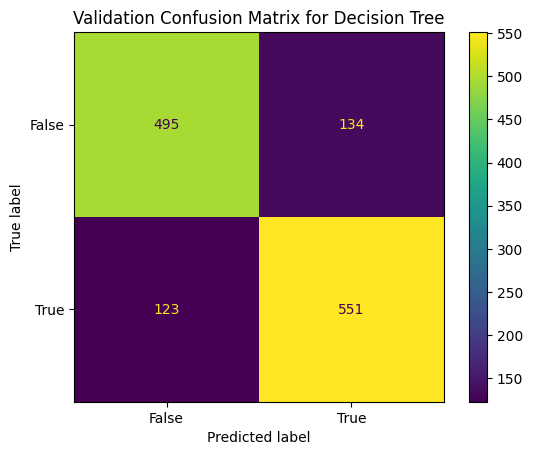

Sensitivity (True Positive Rate): 0.8175074183976261
Specificity (True Negative Rate): 0.7869634340222575


In [197]:
#Decision tree
# Make predictions on the validation set
val_predictions = dt_model.predict(XX_val)

# Calculate the accuracy score for the validation set
val_score = dt_model.score(XX_val, yy_val)
print("Validation accuracy score:", val_score)

#Confusion matrix for validation data
createConfusionMatrix(yy_val, val_predictions, "Validation Confusion Matrix for Decision Tree")

Test accuracy score: 0.7944785276073619


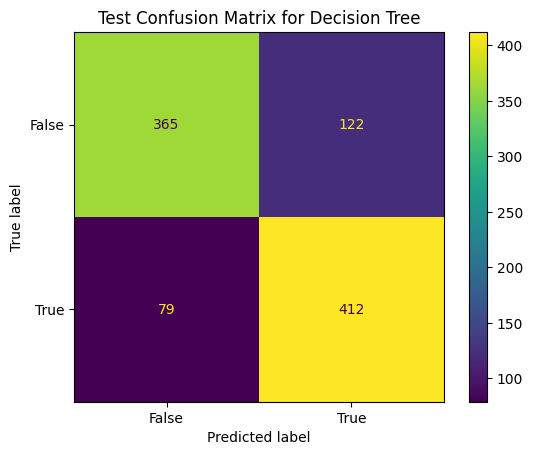

Sensitivity (True Positive Rate): 0.8391038696537678
Specificity (True Negative Rate): 0.7494866529774127


In [198]:
#Decision tree
# Make predictions on the test set
test_predictions = dt_model.predict(XX_test)

# Calculate the accuracy score for the test set
test_score = dt_model.score(XX_test, yy_test)
print("Test accuracy score:", test_score)

#Confusion matrix for testing data
createConfusionMatrix(yy_test, test_predictions, "Test Confusion Matrix for Decision Tree")

<hr>Logistic Regression</hr>

In [190]:
#log reg
# Calculate the accuracy score for the training set
train_score = lr_model.score(XX_train, yy_train)
print("Training accuracy score:", train_score)

Training accuracy score: 0.8096212896622313


Validation accuracy score: 0.8242517267843438


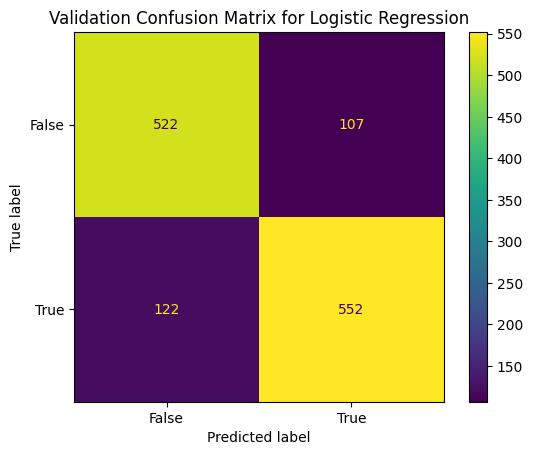

Sensitivity (True Positive Rate): 0.8189910979228486
Specificity (True Negative Rate): 0.8298887122416534


In [199]:
#log reg
# Make predictions on the validation set
val_predictions = lr_model.predict(XX_val)

# Calculate the accuracy score for the validation set
val_score = lr_model.score(XX_val, yy_val)
print("Validation accuracy score:", val_score)

#Confusion matrix for validation data
createConfusionMatrix(yy_val, val_predictions, "Validation Confusion Matrix for Logistic Regression")

Test accuracy score: 0.8241308793456033


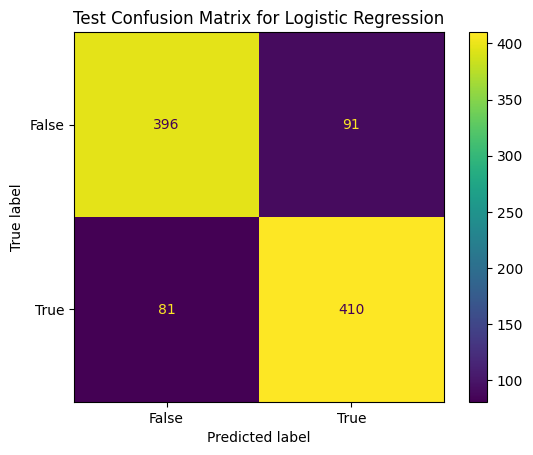

Sensitivity (True Positive Rate): 0.835030549898167
Specificity (True Negative Rate): 0.813141683778234


In [200]:
#log reg
# Make predictions on the test set
test_predictions = lr_model.predict(XX_test)

# Calculate the accuracy score for the test set
test_score = lr_model.score(XX_test, yy_test)
print("Test accuracy score:", test_score)

#Confusion matrix for testing data
createConfusionMatrix(yy_test, test_predictions, "Test Confusion Matrix for Logistic Regression")

<hr>kNN</hr>

In [186]:
#KNN
# Calculate the accuracy score for the training set
train_score = knn_model.score(XX_train, yy_train)
print("Training accuracy score:", train_score)


Training accuracy score: 1.0


Validation accuracy score: 0.8349961627014582


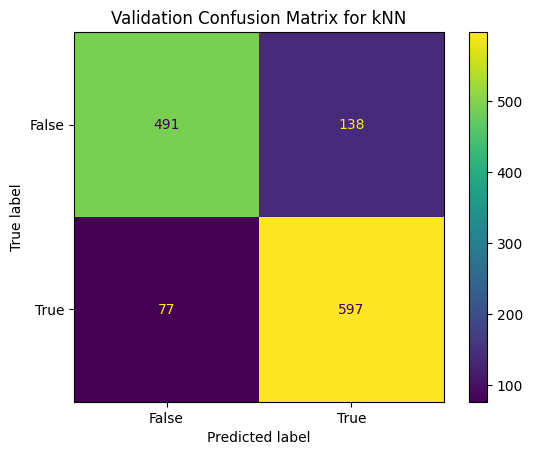

Sensitivity (True Positive Rate): 0.8857566765578635
Specificity (True Negative Rate): 0.78060413354531


In [201]:
#KNN
# Make predictions on the validation set
val_predictions = knn_model.predict(XX_val)

# Calculate the accuracy score for the validation set
val_score = knn_model.score(XX_val, yy_val)
print("Validation accuracy score:", val_score)

#Confusion matrix for validation data
createConfusionMatrix(yy_val, val_predictions, "Validation Confusion Matrix for kNN")

Test accuracy score: 0.8353783231083844


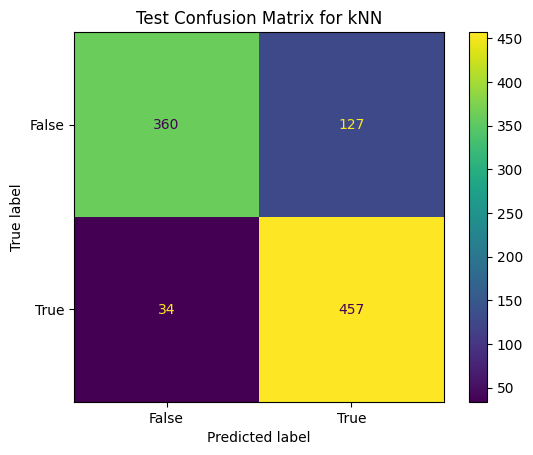

Sensitivity (True Positive Rate): 0.9307535641547862
Specificity (True Negative Rate): 0.7392197125256673


In [202]:
#KNN
# Make predictions on the test set
test_predictions = knn_model.predict(XX_test)

# Calculate the accuracy score for the test set
test_score = knn_model.score(XX_test, yy_test)
print("Test accuracy score:", test_score)

#Confusion matrix for testing data
createConfusionMatrix(yy_test, test_predictions, "Test Confusion Matrix for kNN")

<h2>Export Model and Use Model on New Data</h2>

In [209]:
import joblib

In [211]:
joblib.dump(lr_model, 'Flood_Prediction_model.pkl')

['Flood_Prediction_model.pkl']

This new data is collected from the open meteo api. The data is historical weather data of Kota Bharu from 02/04/2023 to 25/06/2023 (The dates where the model was not trained for)

In [310]:
Hourly_KB = pd.read_csv("Hourly_Past_KB.csv")
Daily_KB = pd.read_csv("Daily_Past_KB.csv")

In [311]:
Hourly_KB.head()

,time,relativehumidity_2m (%),cloudcover (%)
0,2023-04-02T00:00,86,42
1,2023-04-02T01:00,88,48
2,2023-04-02T02:00,90,53
3,2023-04-02T03:00,91,45
4,2023-04-02T04:00,94,44


In [312]:

# Making time in the weather data to be datetime
Hourly_KB['time'] = pd.to_datetime(Hourly_KB['time'], errors='coerce')

# Downsampling hourly data to daily data

Hourly_KB = Hourly_KB.resample('d', on='time').mean()

Hourly_KB = Hourly_KB.reset_index()


In [313]:
Hourly_KB.head()

,time,relativehumidity_2m (%),cloudcover (%)
0,2023-04-02,82.250000,46.208333
1,2023-04-03,85.041667,55.291667
2,2023-04-04,81.291667,28.416667
3,2023-04-05,84.791667,31.333333
4,2023-04-06,82.916667,34.333333


In [314]:
Hourly_KB.shape

(85, 3)

In [315]:
Daily_KB

,time,temperature_2m_max (°C),temperature_2m_mean (°C),rain_sum (mm),precipitation_hours (h)
0,2/4/2023,31.8,27.4,5.5,8
1,3/4/2023,31.4,27.1,15.8,8
2,4/4/2023,32.0,27.7,1.1,7
3,5/4/2023,30.6,27.1,12.5,12
4,6/4/2023,31.4,27.1,3.3,4
...,...,...,...,...,...
80,21/6/2023,31.8,28.4,4.2,4
81,22/6/2023,31.7,28.5,2.5,5
82,23/6/2023,32.3,28.4,2.0,5
83,24/6/2023,31.9,28.0,8.7,15


In [316]:

Hourly_KB['time'] = pd.to_datetime(Hourly_KB['time'], format='%d/%m/%Y').dt.strftime('%d/%m/%Y')
Daily_KB['time'] = pd.to_datetime(Daily_KB['time'], format='%d/%m/%Y').dt.strftime('%d/%m/%Y')


In [317]:
Hourly_KB

,time,relativehumidity_2m (%),cloudcover (%)
0,02/04/2023,82.250000,46.208333
1,03/04/2023,85.041667,55.291667
2,04/04/2023,81.291667,28.416667
3,05/04/2023,84.791667,31.333333
4,06/04/2023,82.916667,34.333333
...,...,...,...
80,21/06/2023,78.291667,26.166667
81,22/06/2023,77.458333,24.625000
82,23/06/2023,81.000000,35.000000
83,24/06/2023,84.125000,31.250000


In [318]:
Daily_KB

,time,temperature_2m_max (°C),temperature_2m_mean (°C),rain_sum (mm),precipitation_hours (h)
0,02/04/2023,31.8,27.4,5.5,8
1,03/04/2023,31.4,27.1,15.8,8
2,04/04/2023,32.0,27.7,1.1,7
3,05/04/2023,30.6,27.1,12.5,12
4,06/04/2023,31.4,27.1,3.3,4
...,...,...,...,...,...
80,21/06/2023,31.8,28.4,4.2,4
81,22/06/2023,31.7,28.5,2.5,5
82,23/06/2023,32.3,28.4,2.0,5
83,24/06/2023,31.9,28.0,8.7,15


In [319]:
prediction_merge= pd.merge(Daily_KB,Hourly_KB, on='time')
print(prediction_merge.shape)

(85, 7)


In [320]:
normalized_prediction = minMaxNormalization(prediction_merge)
normalized_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   time                                 85 non-null     object 
 1   temperature_2m_max (°C)              85 non-null     float64
 2   temperature_2m_mean (°C)             85 non-null     float64
 3   rain_sum (mm)                        85 non-null     float64
 4   precipitation_hours (h)              85 non-null     int64  
 5   relativehumidity_2m (%)              85 non-null     float64
 6   cloudcover (%)                       85 non-null     float64
 7   Normalized_temperature_2m_max (°C)   85 non-null     float64
 8   Normalized_temperature_2m_mean (°C)  85 non-null     float64
 9   Normalized_rain_sum (mm)             85 non-null     float64
 10  Normalized_precipitation_hours (h)   85 non-null     float64
 11  Normalized_relativehumidity_2m (%)

In [321]:
# Filter columns that start with 'Normalized_'
normalized_columns = [col for col in normalized_prediction.columns if ((col.startswith('Normalized_') or col in ['Flood occurrence', 'Geo Locations', 'time']) and col not in ['Normalized_index'])]

# Create a subset of the DataFrame with only the normalized columns
normalized_prediction_only = normalized_prediction[normalized_columns]

In [322]:
normalized_prediction_only.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   time                                 85 non-null     object 
 1   Normalized_temperature_2m_max (°C)   85 non-null     float64
 2   Normalized_temperature_2m_mean (°C)  85 non-null     float64
 3   Normalized_rain_sum (mm)             85 non-null     float64
 4   Normalized_precipitation_hours (h)   85 non-null     float64
 5   Normalized_relativehumidity_2m (%)   85 non-null     float64
 6   Normalized_cloudcover (%)            85 non-null     float64
dtypes: float64(6), object(1)
memory usage: 4.8+ KB


In [323]:
normalized_prediction_only.rename(columns={'Normalized_temperature_2m_mean (°C)': 'Normalized_temperature_2m (°C)'}, inplace=True)

C:\Users\Sarah\AppData\Local\Temp\ipykernel_32396\602508544.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normalized_prediction_only.rename(columns={'Normalized_temperature_2m_mean (°C)': 'Normalized_temperature_2m (°C)'}, inplace=True)


In [324]:
normalized_prediction_only.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 7 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   time                                85 non-null     object 
 1   Normalized_temperature_2m_max (°C)  85 non-null     float64
 2   Normalized_temperature_2m (°C)      85 non-null     float64
 3   Normalized_rain_sum (mm)            85 non-null     float64
 4   Normalized_precipitation_hours (h)  85 non-null     float64
 5   Normalized_relativehumidity_2m (%)  85 non-null     float64
 6   Normalized_cloudcover (%)           85 non-null     float64
dtypes: float64(6), object(1)
memory usage: 4.8+ KB


In [325]:
column_arrangement = ['time','Normalized_temperature_2m (°C)','Normalized_relativehumidity_2m (%)', 'Normalized_cloudcover (%)',	'Normalized_temperature_2m_max (°C)','Normalized_rain_sum (mm)','Normalized_precipitation_hours (h)']

In [326]:
normalized_prediction_only=normalized_prediction_only[column_arrangement]

In [327]:
normalized_prediction_only

,time,Normalized_temperature_2m (°C),Normalized_relativehumidity_2m (%),Normalized_cloudcover (%),Normalized_temperature_2m_max (°C),Normalized_rain_sum (mm),Normalized_precipitation_hours (h)
0,02/04/2023,0.300000,0.569191,0.570659,0.588235,0.120879,0.421053
1,03/04/2023,0.200000,0.744125,0.717362,0.509804,0.347253,0.421053
2,04/04/2023,0.400000,0.509138,0.283311,0.627451,0.024176,0.368421
3,05/04/2023,0.200000,0.728460,0.330417,0.352941,0.274725,0.631579
4,06/04/2023,0.200000,0.610966,0.378869,0.509804,0.072527,0.210526
...,...,...,...,...,...,...,...
80,21/06/2023,0.633333,0.321149,0.246972,0.588235,0.092308,0.210526
81,22/06/2023,0.666667,0.268930,0.222073,0.568627,0.054945,0.263158
82,23/06/2023,0.633333,0.490862,0.389637,0.686275,0.043956,0.263158
83,24/06/2023,0.500000,0.686684,0.329071,0.607843,0.191209,0.789474


In [328]:
model = joblib.load('Flood_Prediction_model.pkl')

In [329]:
predictions = model.predict(normalized_prediction_only.drop('time', axis=1))

In [330]:
predictions

array([False,  True, False,  True, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False])

In [331]:
merged_prediction = pd.concat([normalized_prediction_only, pd.DataFrame(predictions, columns=['Flood occurrence'])], axis=1)

In [332]:
merged_prediction

,time,Normalized_temperature_2m (°C),Normalized_relativehumidity_2m (%),Normalized_cloudcover (%),Normalized_temperature_2m_max (°C),Normalized_rain_sum (mm),Normalized_precipitation_hours (h),Flood occurrence
0,02/04/2023,0.300000,0.569191,0.570659,0.588235,0.120879,0.421053,False
1,03/04/2023,0.200000,0.744125,0.717362,0.509804,0.347253,0.421053,True
2,04/04/2023,0.400000,0.509138,0.283311,0.627451,0.024176,0.368421,False
3,05/04/2023,0.200000,0.728460,0.330417,0.352941,0.274725,0.631579,True
4,06/04/2023,0.200000,0.610966,0.378869,0.509804,0.072527,0.210526,False
...,...,...,...,...,...,...,...,...
80,21/06/2023,0.633333,0.321149,0.246972,0.588235,0.092308,0.210526,False
81,22/06/2023,0.666667,0.268930,0.222073,0.568627,0.054945,0.263158,False
82,23/06/2023,0.633333,0.490862,0.389637,0.686275,0.043956,0.263158,False
83,24/06/2023,0.500000,0.686684,0.329071,0.607843,0.191209,0.789474,False


In [333]:
flood = merged_prediction['Flood occurrence'].value_counts()[True]
no_flood = merged_prediction['Flood occurrence'].value_counts()[False]
print(flood,"/",no_flood+flood,"=",flood/(no_flood+flood))
print(no_flood,"/",no_flood+flood,"=",no_flood/(no_flood+flood))

12 / 85 = 0.1411764705882353
73 / 85 = 0.8588235294117647


In [334]:
merged_prediction.to_csv('prediction_data.csv', index=False)
